# Data Processing

In [1]:
import importlib
import datascraping
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import csv
import scipy.stats as stats


df=pd.read_csv("data.csv")
df

/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Unnamed: 0,0,Block,Flat model,Flat type,Floor area sqm (Sqm),Lease commence date,Month,Remaining lease,Resale price ($),Storey range,Street name,Town
0,0,NaN,172.0,Improved,2 ROOM,45.0,1986.0,2019-09,65 years 04 months,178000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO
1,1,NaN,542.0,New Generation,3 ROOM,68.0,1981.0,2019-09,60 years 05 months,247000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO
2,2,NaN,556.0,New Generation,3 ROOM,68.0,1980.0,2019-09,59 years 04 months,260000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO
3,3,NaN,416.0,New Generation,3 ROOM,89.0,1979.0,2019-09,58 years 11 months,338000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO
4,4,NaN,456.0,New Generation,3 ROOM,89.0,1980.0,2019-09,59 years 04 months,340000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,NaN,724,Maisonette,EXECUTIVE,146.0,1986.0,2019-08,65 years 11 months,555000.0,04 TO 06,YISHUN ST 71,YISHUN
1996,1,NaN,723,Apartment,EXECUTIVE,142.0,1986.0,2019-08,65 years 09 months,570000.0,10 TO 12,YISHUN ST 71,YISHUN
1997,2,NaN,828,Apartment,EXECUTIVE,142.0,1988.0,2019-08,67 years 05 months,570000.0,04 TO 06,YISHUN ST 81,YISHUN
1998,3,NaN,666,Multi Generation,MULTI-GENERATION,179.0,1987.0,2019-08,67 years 04 months,788888.0,04 TO 06,YISHUN AVE 4,YISHUN


In [2]:
df.drop(df.columns[[0,1]], axis=1, inplace=True)

In [3]:
df.columns.values

array(['Block', 'Flat model', 'Flat type', 'Floor area sqm (Sqm)',
       'Lease commence date', 'Month', 'Remaining lease',
       'Resale price ($)', 'Storey range', 'Street name', 'Town'],
      dtype=object)

In [4]:
df.columns =['block','flat_model','flat_type','floor_area_sqm', 'lease_commence_date', 'month','remaining_lease','resale_price','storey_range','street_name','town']

In [5]:
df

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,172.0,Improved,2 ROOM,45.0,1986.0,2019-09,65 years 04 months,178000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO
1,542.0,New Generation,3 ROOM,68.0,1981.0,2019-09,60 years 05 months,247000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO
2,556.0,New Generation,3 ROOM,68.0,1980.0,2019-09,59 years 04 months,260000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO
3,416.0,New Generation,3 ROOM,89.0,1979.0,2019-09,58 years 11 months,338000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO
4,456.0,New Generation,3 ROOM,89.0,1980.0,2019-09,59 years 04 months,340000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO
...,...,...,...,...,...,...,...,...,...,...,...
1995,724,Maisonette,EXECUTIVE,146.0,1986.0,2019-08,65 years 11 months,555000.0,04 TO 06,YISHUN ST 71,YISHUN
1996,723,Apartment,EXECUTIVE,142.0,1986.0,2019-08,65 years 09 months,570000.0,10 TO 12,YISHUN ST 71,YISHUN
1997,828,Apartment,EXECUTIVE,142.0,1988.0,2019-08,67 years 05 months,570000.0,04 TO 06,YISHUN ST 81,YISHUN
1998,666,Multi Generation,MULTI-GENERATION,179.0,1987.0,2019-08,67 years 04 months,788888.0,04 TO 06,YISHUN AVE 4,YISHUN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
block                  2000 non-null object
flat_model             2000 non-null object
flat_type              2000 non-null object
floor_area_sqm         2000 non-null float64
lease_commence_date    2000 non-null float64
month                  2000 non-null object
remaining_lease        2000 non-null object
resale_price           2000 non-null float64
storey_range           2000 non-null object
street_name            2000 non-null object
town                   2000 non-null object
dtypes: float64(3), object(8)
memory usage: 172.0+ KB


In [7]:
df['remaining_lease1']=df['remaining_lease'].str.replace("years","")
df

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,remaining_lease1
0,172.0,Improved,2 ROOM,45.0,1986.0,2019-09,65 years 04 months,178000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO,65 04 months
1,542.0,New Generation,3 ROOM,68.0,1981.0,2019-09,60 years 05 months,247000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,60 05 months
2,556.0,New Generation,3 ROOM,68.0,1980.0,2019-09,59 years 04 months,260000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,59 04 months
3,416.0,New Generation,3 ROOM,89.0,1979.0,2019-09,58 years 11 months,338000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,58 11 months
4,456.0,New Generation,3 ROOM,89.0,1980.0,2019-09,59 years 04 months,340000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO,59 04 months
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,724,Maisonette,EXECUTIVE,146.0,1986.0,2019-08,65 years 11 months,555000.0,04 TO 06,YISHUN ST 71,YISHUN,65 11 months
1996,723,Apartment,EXECUTIVE,142.0,1986.0,2019-08,65 years 09 months,570000.0,10 TO 12,YISHUN ST 71,YISHUN,65 09 months
1997,828,Apartment,EXECUTIVE,142.0,1988.0,2019-08,67 years 05 months,570000.0,04 TO 06,YISHUN ST 81,YISHUN,67 05 months
1998,666,Multi Generation,MULTI-GENERATION,179.0,1987.0,2019-08,67 years 04 months,788888.0,04 TO 06,YISHUN AVE 4,YISHUN,67 04 months


In [8]:
df['remaining_lease2']=df['remaining_lease1'].str.replace("months","")
df

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,remaining_lease1,remaining_lease2
0,172.0,Improved,2 ROOM,45.0,1986.0,2019-09,65 years 04 months,178000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO,65 04 months,65 04
1,542.0,New Generation,3 ROOM,68.0,1981.0,2019-09,60 years 05 months,247000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,60 05 months,60 05
2,556.0,New Generation,3 ROOM,68.0,1980.0,2019-09,59 years 04 months,260000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04
3,416.0,New Generation,3 ROOM,89.0,1979.0,2019-09,58 years 11 months,338000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,58 11 months,58 11
4,456.0,New Generation,3 ROOM,89.0,1980.0,2019-09,59 years 04 months,340000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,724,Maisonette,EXECUTIVE,146.0,1986.0,2019-08,65 years 11 months,555000.0,04 TO 06,YISHUN ST 71,YISHUN,65 11 months,65 11
1996,723,Apartment,EXECUTIVE,142.0,1986.0,2019-08,65 years 09 months,570000.0,10 TO 12,YISHUN ST 71,YISHUN,65 09 months,65 09
1997,828,Apartment,EXECUTIVE,142.0,1988.0,2019-08,67 years 05 months,570000.0,04 TO 06,YISHUN ST 81,YISHUN,67 05 months,67 05
1998,666,Multi Generation,MULTI-GENERATION,179.0,1987.0,2019-08,67 years 04 months,788888.0,04 TO 06,YISHUN AVE 4,YISHUN,67 04 months,67 04


In [9]:
df['remaining_lease3']=df['remaining_lease2'].str.replace("month","")
df

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,remaining_lease1,remaining_lease2,remaining_lease3
0,172.0,Improved,2 ROOM,45.0,1986.0,2019-09,65 years 04 months,178000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO,65 04 months,65 04,65 04
1,542.0,New Generation,3 ROOM,68.0,1981.0,2019-09,60 years 05 months,247000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,60 05 months,60 05,60 05
2,556.0,New Generation,3 ROOM,68.0,1980.0,2019-09,59 years 04 months,260000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04
3,416.0,New Generation,3 ROOM,89.0,1979.0,2019-09,58 years 11 months,338000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,58 11 months,58 11,58 11
4,456.0,New Generation,3 ROOM,89.0,1980.0,2019-09,59 years 04 months,340000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,724,Maisonette,EXECUTIVE,146.0,1986.0,2019-08,65 years 11 months,555000.0,04 TO 06,YISHUN ST 71,YISHUN,65 11 months,65 11,65 11
1996,723,Apartment,EXECUTIVE,142.0,1986.0,2019-08,65 years 09 months,570000.0,10 TO 12,YISHUN ST 71,YISHUN,65 09 months,65 09,65 09
1997,828,Apartment,EXECUTIVE,142.0,1988.0,2019-08,67 years 05 months,570000.0,04 TO 06,YISHUN ST 81,YISHUN,67 05 months,67 05,67 05
1998,666,Multi Generation,MULTI-GENERATION,179.0,1987.0,2019-08,67 years 04 months,788888.0,04 TO 06,YISHUN AVE 4,YISHUN,67 04 months,67 04,67 04


In [10]:
df['remaining_lease4']=df['remaining_lease3'].str.split()
df

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,remaining_lease1,remaining_lease2,remaining_lease3,remaining_lease4
0,172.0,Improved,2 ROOM,45.0,1986.0,2019-09,65 years 04 months,178000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO,65 04 months,65 04,65 04,"[65, 04]"
1,542.0,New Generation,3 ROOM,68.0,1981.0,2019-09,60 years 05 months,247000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,60 05 months,60 05,60 05,"[60, 05]"
2,556.0,New Generation,3 ROOM,68.0,1980.0,2019-09,59 years 04 months,260000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04,"[59, 04]"
3,416.0,New Generation,3 ROOM,89.0,1979.0,2019-09,58 years 11 months,338000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,58 11 months,58 11,58 11,"[58, 11]"
4,456.0,New Generation,3 ROOM,89.0,1980.0,2019-09,59 years 04 months,340000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04,"[59, 04]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,724,Maisonette,EXECUTIVE,146.0,1986.0,2019-08,65 years 11 months,555000.0,04 TO 06,YISHUN ST 71,YISHUN,65 11 months,65 11,65 11,"[65, 11]"
1996,723,Apartment,EXECUTIVE,142.0,1986.0,2019-08,65 years 09 months,570000.0,10 TO 12,YISHUN ST 71,YISHUN,65 09 months,65 09,65 09,"[65, 09]"
1997,828,Apartment,EXECUTIVE,142.0,1988.0,2019-08,67 years 05 months,570000.0,04 TO 06,YISHUN ST 81,YISHUN,67 05 months,67 05,67 05,"[67, 05]"
1998,666,Multi Generation,MULTI-GENERATION,179.0,1987.0,2019-08,67 years 04 months,788888.0,04 TO 06,YISHUN AVE 4,YISHUN,67 04 months,67 04,67 04,"[67, 04]"


In [11]:
df['remaining_lease_years']=round(df['remaining_lease4'].str[0:1].str[0].astype(int)+df['remaining_lease4'].str[0:2].str[1].fillna(0).astype(int)/12,2)
df

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,remaining_lease1,remaining_lease2,remaining_lease3,remaining_lease4,remaining_lease_years
0,172.0,Improved,2 ROOM,45.0,1986.0,2019-09,65 years 04 months,178000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO,65 04 months,65 04,65 04,"[65, 04]",65.33
1,542.0,New Generation,3 ROOM,68.0,1981.0,2019-09,60 years 05 months,247000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,60 05 months,60 05,60 05,"[60, 05]",60.42
2,556.0,New Generation,3 ROOM,68.0,1980.0,2019-09,59 years 04 months,260000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04,"[59, 04]",59.33
3,416.0,New Generation,3 ROOM,89.0,1979.0,2019-09,58 years 11 months,338000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,58 11 months,58 11,58 11,"[58, 11]",58.92
4,456.0,New Generation,3 ROOM,89.0,1980.0,2019-09,59 years 04 months,340000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04,"[59, 04]",59.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,724,Maisonette,EXECUTIVE,146.0,1986.0,2019-08,65 years 11 months,555000.0,04 TO 06,YISHUN ST 71,YISHUN,65 11 months,65 11,65 11,"[65, 11]",65.92
1996,723,Apartment,EXECUTIVE,142.0,1986.0,2019-08,65 years 09 months,570000.0,10 TO 12,YISHUN ST 71,YISHUN,65 09 months,65 09,65 09,"[65, 09]",65.75
1997,828,Apartment,EXECUTIVE,142.0,1988.0,2019-08,67 years 05 months,570000.0,04 TO 06,YISHUN ST 81,YISHUN,67 05 months,67 05,67 05,"[67, 05]",67.42
1998,666,Multi Generation,MULTI-GENERATION,179.0,1987.0,2019-08,67 years 04 months,788888.0,04 TO 06,YISHUN AVE 4,YISHUN,67 04 months,67 04,67 04,"[67, 04]",67.33


In [12]:
df

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,remaining_lease1,remaining_lease2,remaining_lease3,remaining_lease4,remaining_lease_years
0,172.0,Improved,2 ROOM,45.0,1986.0,2019-09,65 years 04 months,178000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO,65 04 months,65 04,65 04,"[65, 04]",65.33
1,542.0,New Generation,3 ROOM,68.0,1981.0,2019-09,60 years 05 months,247000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,60 05 months,60 05,60 05,"[60, 05]",60.42
2,556.0,New Generation,3 ROOM,68.0,1980.0,2019-09,59 years 04 months,260000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04,"[59, 04]",59.33
3,416.0,New Generation,3 ROOM,89.0,1979.0,2019-09,58 years 11 months,338000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,58 11 months,58 11,58 11,"[58, 11]",58.92
4,456.0,New Generation,3 ROOM,89.0,1980.0,2019-09,59 years 04 months,340000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04,"[59, 04]",59.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,724,Maisonette,EXECUTIVE,146.0,1986.0,2019-08,65 years 11 months,555000.0,04 TO 06,YISHUN ST 71,YISHUN,65 11 months,65 11,65 11,"[65, 11]",65.92
1996,723,Apartment,EXECUTIVE,142.0,1986.0,2019-08,65 years 09 months,570000.0,10 TO 12,YISHUN ST 71,YISHUN,65 09 months,65 09,65 09,"[65, 09]",65.75
1997,828,Apartment,EXECUTIVE,142.0,1988.0,2019-08,67 years 05 months,570000.0,04 TO 06,YISHUN ST 81,YISHUN,67 05 months,67 05,67 05,"[67, 05]",67.42
1998,666,Multi Generation,MULTI-GENERATION,179.0,1987.0,2019-08,67 years 04 months,788888.0,04 TO 06,YISHUN AVE 4,YISHUN,67 04 months,67 04,67 04,"[67, 04]",67.33


In [13]:
df['region']=df['town']
df

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,remaining_lease1,remaining_lease2,remaining_lease3,remaining_lease4,remaining_lease_years,region
0,172.0,Improved,2 ROOM,45.0,1986.0,2019-09,65 years 04 months,178000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO,65 04 months,65 04,65 04,"[65, 04]",65.33,ANG MO KIO
1,542.0,New Generation,3 ROOM,68.0,1981.0,2019-09,60 years 05 months,247000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,60 05 months,60 05,60 05,"[60, 05]",60.42,ANG MO KIO
2,556.0,New Generation,3 ROOM,68.0,1980.0,2019-09,59 years 04 months,260000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04,"[59, 04]",59.33,ANG MO KIO
3,416.0,New Generation,3 ROOM,89.0,1979.0,2019-09,58 years 11 months,338000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,58 11 months,58 11,58 11,"[58, 11]",58.92,ANG MO KIO
4,456.0,New Generation,3 ROOM,89.0,1980.0,2019-09,59 years 04 months,340000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04,"[59, 04]",59.33,ANG MO KIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,724,Maisonette,EXECUTIVE,146.0,1986.0,2019-08,65 years 11 months,555000.0,04 TO 06,YISHUN ST 71,YISHUN,65 11 months,65 11,65 11,"[65, 11]",65.92,YISHUN
1996,723,Apartment,EXECUTIVE,142.0,1986.0,2019-08,65 years 09 months,570000.0,10 TO 12,YISHUN ST 71,YISHUN,65 09 months,65 09,65 09,"[65, 09]",65.75,YISHUN
1997,828,Apartment,EXECUTIVE,142.0,1988.0,2019-08,67 years 05 months,570000.0,04 TO 06,YISHUN ST 81,YISHUN,67 05 months,67 05,67 05,"[67, 05]",67.42,YISHUN
1998,666,Multi Generation,MULTI-GENERATION,179.0,1987.0,2019-08,67 years 04 months,788888.0,04 TO 06,YISHUN AVE 4,YISHUN,67 04 months,67 04,67 04,"[67, 04]",67.33,YISHUN


In [14]:
df.replace({'region':{'ANG MO KIO' :'North-East', 'BEDOK' : 'East', 'BISHAN' : 'Central', 'BUKIT BATOK' : 'West','BUKIT MERAH':'Central','BUKIT PANJANG':'West','BUKIT TIMAH':'Central','CENTRAL AREA':'Central','CHOA CHU KANG':'West','CLEMENTI':'West','GEYLANG':'Central','HOUGANG':'North-East','JURONG EAST':'West','JURONG WEST':'West','KALLANG/WHAMPOA':'Central','MARINE PARADE':'Central','PASIR RIS':'East','PUNGGOL':'North-East','QUEENSTOWN':'Central','SEMBAWANG':'North','SENGKANG':'North-East','SERANGOON':'North-East','TAMPINES':'East','TOA PAYOH':'Central','WOODLANDS':'North','YISHUN':'North'}},inplace = True)
df

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,remaining_lease1,remaining_lease2,remaining_lease3,remaining_lease4,remaining_lease_years,region
0,172.0,Improved,2 ROOM,45.0,1986.0,2019-09,65 years 04 months,178000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO,65 04 months,65 04,65 04,"[65, 04]",65.33,North-East
1,542.0,New Generation,3 ROOM,68.0,1981.0,2019-09,60 years 05 months,247000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,60 05 months,60 05,60 05,"[60, 05]",60.42,North-East
2,556.0,New Generation,3 ROOM,68.0,1980.0,2019-09,59 years 04 months,260000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04,"[59, 04]",59.33,North-East
3,416.0,New Generation,3 ROOM,89.0,1979.0,2019-09,58 years 11 months,338000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,58 11 months,58 11,58 11,"[58, 11]",58.92,North-East
4,456.0,New Generation,3 ROOM,89.0,1980.0,2019-09,59 years 04 months,340000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04,"[59, 04]",59.33,North-East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,724,Maisonette,EXECUTIVE,146.0,1986.0,2019-08,65 years 11 months,555000.0,04 TO 06,YISHUN ST 71,YISHUN,65 11 months,65 11,65 11,"[65, 11]",65.92,North
1996,723,Apartment,EXECUTIVE,142.0,1986.0,2019-08,65 years 09 months,570000.0,10 TO 12,YISHUN ST 71,YISHUN,65 09 months,65 09,65 09,"[65, 09]",65.75,North
1997,828,Apartment,EXECUTIVE,142.0,1988.0,2019-08,67 years 05 months,570000.0,04 TO 06,YISHUN ST 81,YISHUN,67 05 months,67 05,67 05,"[67, 05]",67.42,North
1998,666,Multi Generation,MULTI-GENERATION,179.0,1987.0,2019-08,67 years 04 months,788888.0,04 TO 06,YISHUN AVE 4,YISHUN,67 04 months,67 04,67 04,"[67, 04]",67.33,North


In [15]:
df.replace({'flat_type':{'1 ROOM':1,'2 ROOM':2,'3 ROOM':3,'4 ROOM':4,'5 ROOM':5,'EXECUTIVE':6,'MULTI-GENERATION':7}},inplace = True)
df

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,remaining_lease1,remaining_lease2,remaining_lease3,remaining_lease4,remaining_lease_years,region
0,172.0,Improved,2,45.0,1986.0,2019-09,65 years 04 months,178000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO,65 04 months,65 04,65 04,"[65, 04]",65.33,North-East
1,542.0,New Generation,3,68.0,1981.0,2019-09,60 years 05 months,247000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,60 05 months,60 05,60 05,"[60, 05]",60.42,North-East
2,556.0,New Generation,3,68.0,1980.0,2019-09,59 years 04 months,260000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04,"[59, 04]",59.33,North-East
3,416.0,New Generation,3,89.0,1979.0,2019-09,58 years 11 months,338000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,58 11 months,58 11,58 11,"[58, 11]",58.92,North-East
4,456.0,New Generation,3,89.0,1980.0,2019-09,59 years 04 months,340000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04,"[59, 04]",59.33,North-East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,724,Maisonette,6,146.0,1986.0,2019-08,65 years 11 months,555000.0,04 TO 06,YISHUN ST 71,YISHUN,65 11 months,65 11,65 11,"[65, 11]",65.92,North
1996,723,Apartment,6,142.0,1986.0,2019-08,65 years 09 months,570000.0,10 TO 12,YISHUN ST 71,YISHUN,65 09 months,65 09,65 09,"[65, 09]",65.75,North
1997,828,Apartment,6,142.0,1988.0,2019-08,67 years 05 months,570000.0,04 TO 06,YISHUN ST 81,YISHUN,67 05 months,67 05,67 05,"[67, 05]",67.42,North
1998,666,Multi Generation,7,179.0,1987.0,2019-08,67 years 04 months,788888.0,04 TO 06,YISHUN AVE 4,YISHUN,67 04 months,67 04,67 04,"[67, 04]",67.33,North


In [16]:
df.replace({'storey_range':{'01 TO 03':2,'04 TO 06':5,'07 TO 09':8,'10 TO 12':11,'13 TO 15':14,'16 TO 18':17,'19 TO 21':20,'22 TO 24':23,'25 TO 27':26,'25 TO 27':26,'28 TO 30':29,'31 TO 33':32,'34 TO 36':35,'37 TO 39':38,'40 TO 42':41}},inplace = True)


In [17]:
df['storey_range']=df['storey_range'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
block                    2000 non-null object
flat_model               2000 non-null object
flat_type                2000 non-null int64
floor_area_sqm           2000 non-null float64
lease_commence_date      2000 non-null float64
month                    2000 non-null object
remaining_lease          2000 non-null object
resale_price             2000 non-null float64
storey_range             2000 non-null int64
street_name              2000 non-null object
town                     2000 non-null object
remaining_lease1         2000 non-null object
remaining_lease2         2000 non-null object
remaining_lease3         2000 non-null object
remaining_lease4         2000 non-null object
remaining_lease_years    2000 non-null float64
region                   2000 non-null object
dtypes: float64(4), int64(2), object(11)
memory usage: 265.8+ KB


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe568af9f98>,
      dtype=object)

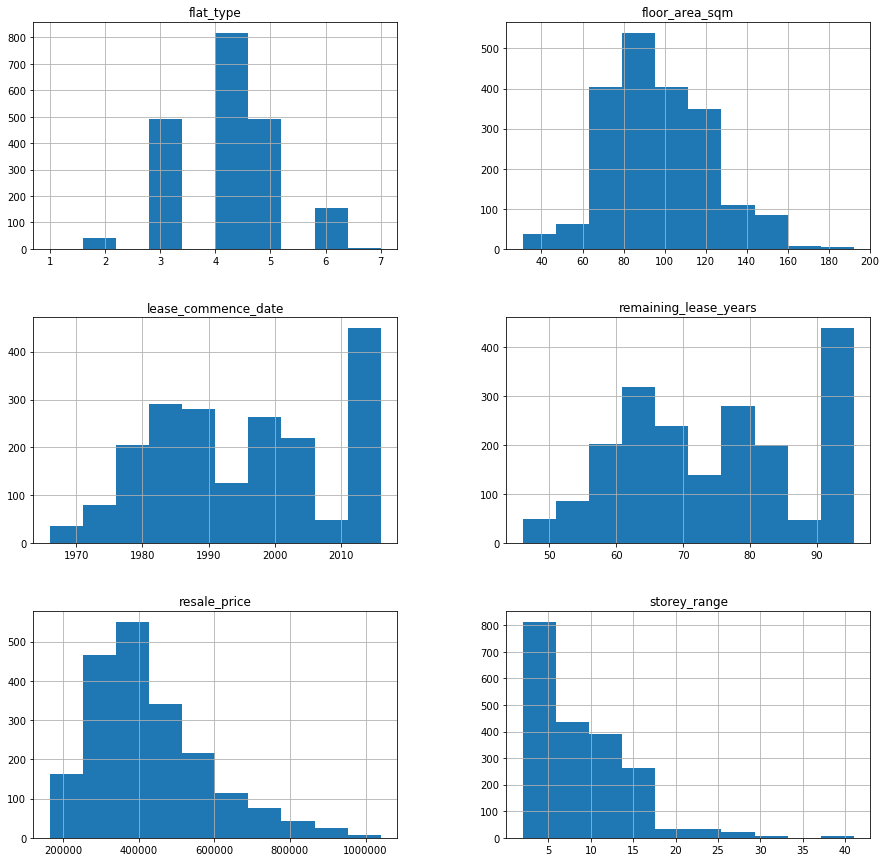

In [20]:
pd.DataFrame.hist(df,figsize=[15,15])

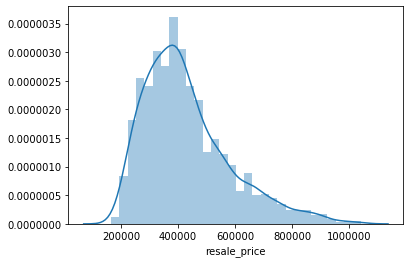

In [21]:
sns.distplot(df['resale_price'])

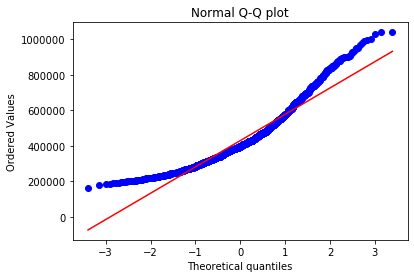

In [22]:
# diagnose/inspect residual normality using qqplot:
stats.probplot(df['resale_price'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [23]:
print("skewness: %f" % df['resale_price'].skew())
print("kurtosis: %f" % df['resale_price'].kurt())

skewness: 1.072732
kurtosis: 1.064611


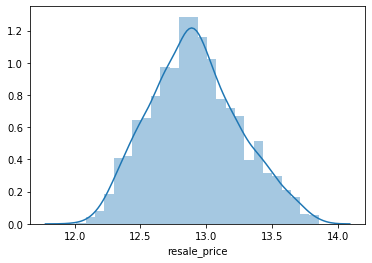

In [24]:
sns.distplot(np.log(df['resale_price']))

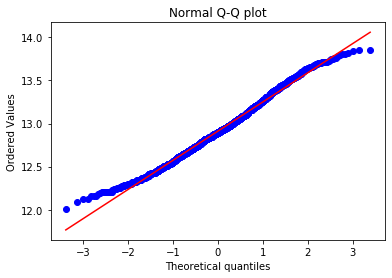

In [25]:
# diagnose/inspect residual normality using qqplot:
stats.probplot(np.log(df['resale_price']), dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [26]:
print("skewness: %f" % np.log(df['resale_price']).skew())
print("kurtosis: %f" % np.log(df['resale_price']).kurt())

skewness: 0.233567
kurtosis: -0.346293


In [27]:
df.corr()

,flat_type,floor_area_sqm,lease_commence_date,resale_price,storey_range,remaining_lease_years
flat_type,1.000000,0.955634,0.167621,0.653887,0.011205,0.168840
floor_area_sqm,0.955634,1.000000,0.108284,0.645954,-0.028664,0.109772
lease_commence_date,0.167621,0.108284,1.000000,0.307882,0.261641,0.999784
resale_price,0.653887,0.645954,0.307882,1.000000,0.358374,0.307745
storey_range,0.011205,-0.028664,0.261641,0.358374,1.000000,0.260521
remaining_lease_years,0.168840,0.109772,0.999784,0.307745,0.260521,1.000000


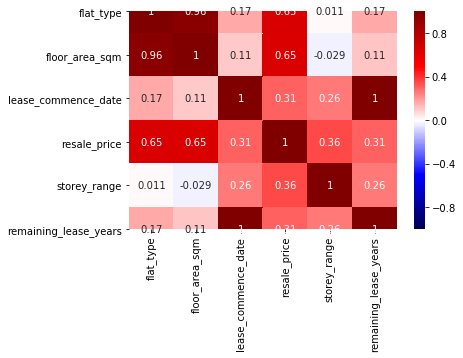

In [28]:
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [29]:
corr_sale = df.corr().resale_price
corr_field = corr_sale.sort_values(ascending = False).head(11)
corr_field

resale_price             1.000000
flat_type                0.653887
floor_area_sqm           0.645954
storey_range             0.358374
lease_commence_date      0.307882
remaining_lease_years    0.307745
Name: resale_price, dtype: float64

In [30]:
y_log=np.log(df.resale_price)
y_log

0       12.089539
1       12.417144
2       12.468437
3       12.730801
4       12.736701
          ...    
1995    13.226723
1996    13.253392
1997    13.253392
1998    13.578380
1999    13.514405
Name: resale_price, Length: 2000, dtype: float64

In [31]:
corr_field = corr_field.drop(['resale_price']).index

In [32]:
corr_field 

Index(['flat_type', 'floor_area_sqm', 'storey_range', 'lease_commence_date',
       'remaining_lease_years'],
      dtype='object')

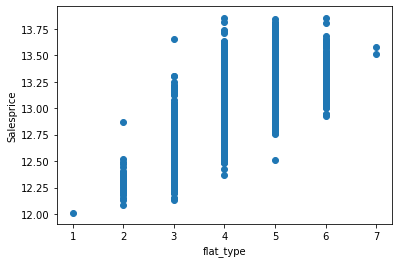

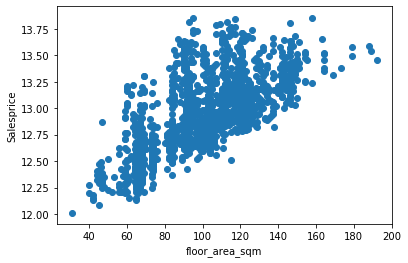

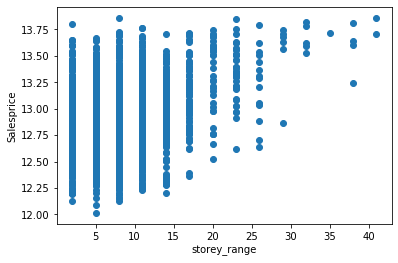

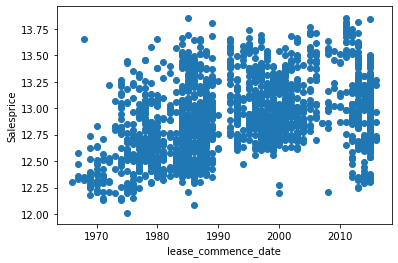

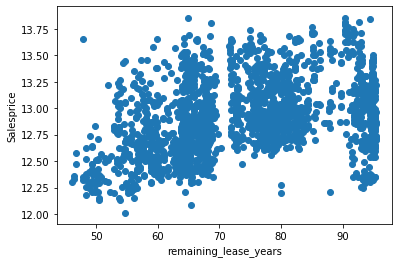

In [33]:
for i in corr_field:
    plt.scatter(df[i],y_log)
    plt.xlabel(i)
    plt.ylabel("Salesprice")
    plt.show()

In [34]:
df

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,remaining_lease1,remaining_lease2,remaining_lease3,remaining_lease4,remaining_lease_years,region
0,172.0,Improved,2,45.0,1986.0,2019-09,65 years 04 months,178000.0,5,ANG MO KIO AVE 4,ANG MO KIO,65 04 months,65 04,65 04,"[65, 04]",65.33,North-East
1,542.0,New Generation,3,68.0,1981.0,2019-09,60 years 05 months,247000.0,11,ANG MO KIO AVE 10,ANG MO KIO,60 05 months,60 05,60 05,"[60, 05]",60.42,North-East
2,556.0,New Generation,3,68.0,1980.0,2019-09,59 years 04 months,260000.0,2,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04,"[59, 04]",59.33,North-East
3,416.0,New Generation,3,89.0,1979.0,2019-09,58 years 11 months,338000.0,11,ANG MO KIO AVE 10,ANG MO KIO,58 11 months,58 11,58 11,"[58, 11]",58.92,North-East
4,456.0,New Generation,3,89.0,1980.0,2019-09,59 years 04 months,340000.0,8,ANG MO KIO AVE 10,ANG MO KIO,59 04 months,59 04,59 04,"[59, 04]",59.33,North-East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,724,Maisonette,6,146.0,1986.0,2019-08,65 years 11 months,555000.0,5,YISHUN ST 71,YISHUN,65 11 months,65 11,65 11,"[65, 11]",65.92,North
1996,723,Apartment,6,142.0,1986.0,2019-08,65 years 09 months,570000.0,11,YISHUN ST 71,YISHUN,65 09 months,65 09,65 09,"[65, 09]",65.75,North
1997,828,Apartment,6,142.0,1988.0,2019-08,67 years 05 months,570000.0,5,YISHUN ST 81,YISHUN,67 05 months,67 05,67 05,"[67, 05]",67.42,North
1998,666,Multi Generation,7,179.0,1987.0,2019-08,67 years 04 months,788888.0,5,YISHUN AVE 4,YISHUN,67 04 months,67 04,67 04,"[67, 04]",67.33,North


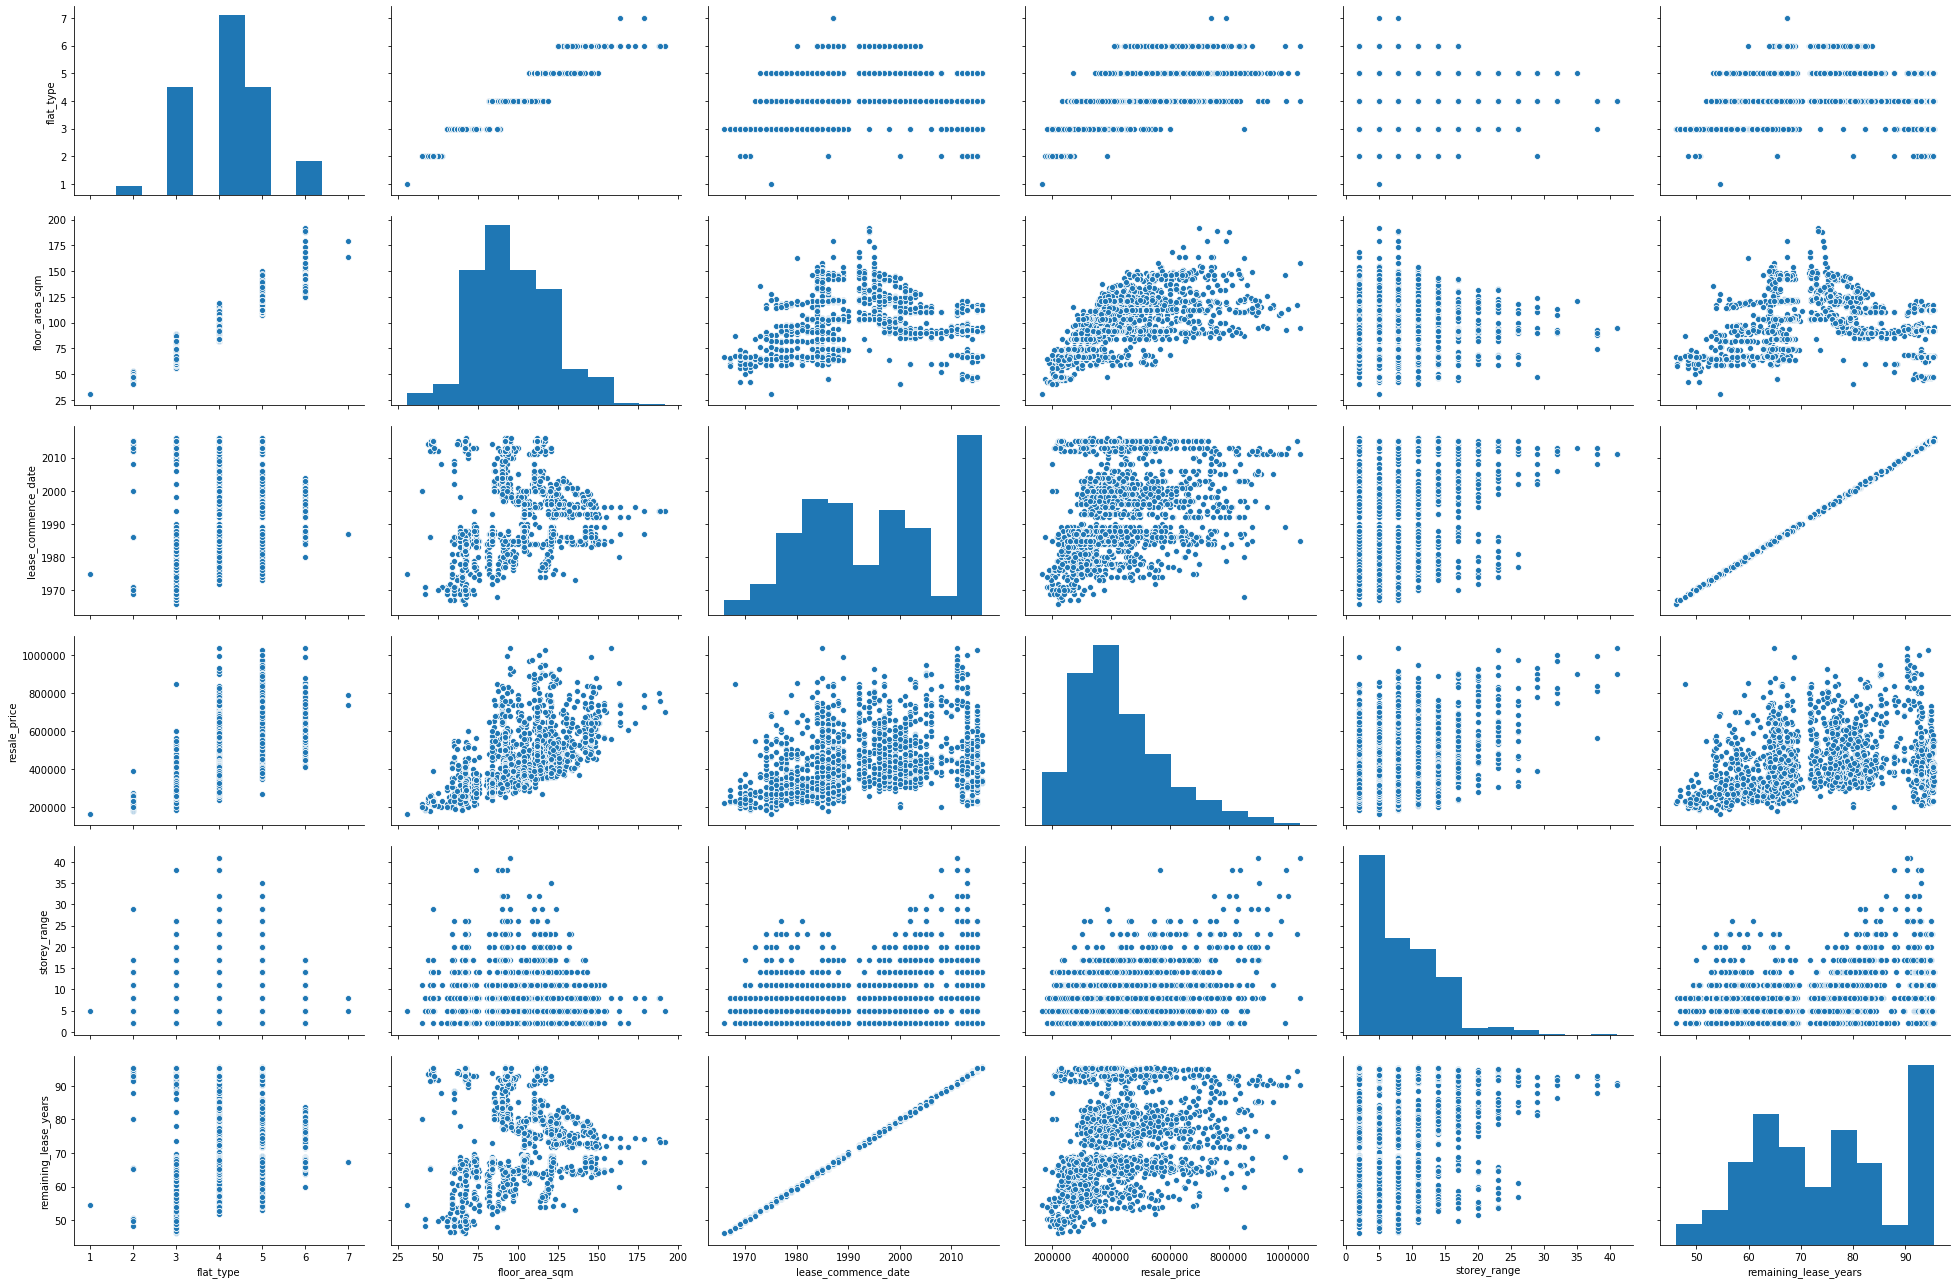

In [35]:
sns.pairplot(df, height=3, aspect=1.5)

```
Central 1
East 2
North 3
North-East 4 
West 5


1)ANG MO KIO North-East Region    (4)
2)BEDOK East Region               (2)
3)BISHAN Central Region           (1)
4)BUKIT BATOK West Region         (5)
5)BUKIT MERAH Central Region      (1)
6)BUKIT PANJANG West Region       (5)
7)BUKIT TIMAH Central Region      (1)
8)CENTRAL AREA Central Region     (1)
9)CHOA CHU KANG West Region       (5)
10)CLEMENTI West Region           (5)
11)GEYLANG Central Region         (1)
12)HOUGANG North-East Region      (4)
13)JURONG EAST West Region        (5)
14)JURONG WEST West Region        (5)
15)KALLANG/WHAMPOA Central Region (1)
16)MARINE PARADE Central Region   (1)
17)PASIR RIS East Region          (2)
18)PUNGGOL North-East Region      (4)
19)QUEENSTOWN Central Region      (1)
20)SEMBAWANG North Region         (3) 
21)SENGKANG North-East Region     (4)
22)SERANGOON North-East Region    (4)
23)TAMPINES East Region           (2)
24)TOA PAYOH Central Region       (1)
25)WOODLANDS North Region         (3) 
26)YISHUN North Region            (3) 


1 ROOM           1
2 ROOM           2
3 ROOM           3
4 ROOM           4
5 ROOM           5
EXECUTIVE        6
MULTI-GENERATION 7



01 TO 03 1
04 TO 06 2
07 TO 09 3
10 TO 12 4
13 TO 15 5
16 TO 18 6
19 TO 21 7
22 TO 24 8
25 TO 27 9
28 TO 30 10
31 TO 33 11
34 TO 36 12
37 TO 39 13
40 TO 42 14
43 TO 45 15
46 TO 48 16
49 TO 51 17


Adjoined flat           1
Apartment               2
DBSS                    3
Improved                4
Improved-Maisonette     5
Maisonette              6
Model A                 7
Model A-Maisonette      8
Model A2                9
Multi Generation        10
New Generation          11
Premium Apartment       12
Premium Apartment Loft  13
Premium Maisonette      14
Simplified              15
Standard                16
Terrace                 17
Type S1                 18
Type S2                 19

```


In [36]:
df.columns.values

array(['block', 'flat_model', 'flat_type', 'floor_area_sqm',
       'lease_commence_date', 'month', 'remaining_lease', 'resale_price',
       'storey_range', 'street_name', 'town', 'remaining_lease1',
       'remaining_lease2', 'remaining_lease3', 'remaining_lease4',
       'remaining_lease_years', 'region'], dtype=object)

In [37]:
df.drop(df.columns[[0,6,9,11,12,13,14]], axis=1, inplace=True)

In [38]:
# combine date and time into a single datetime column
df["month"] = pd.to_datetime(df.month, format="%Y-%m")

In [39]:
hdb = pd.get_dummies(df)

In [40]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 54 columns):
flat_type                        2000 non-null int64
floor_area_sqm                   2000 non-null float64
lease_commence_date              2000 non-null float64
month                            2000 non-null datetime64[ns]
resale_price                     2000 non-null float64
storey_range                     2000 non-null int64
remaining_lease_years            2000 non-null float64
flat_model_Adjoined flat         2000 non-null uint8
flat_model_Apartment             2000 non-null uint8
flat_model_DBSS                  2000 non-null uint8
flat_model_Improved              2000 non-null uint8
flat_model_Maisonette            2000 non-null uint8
flat_model_Model A               2000 non-null uint8
flat_model_Model A-Maisonette    2000 non-null uint8
flat_model_Model A2              2000 non-null uint8
flat_model_Multi Generation      2000 non-null uint8
flat_model_New Generation   

In [41]:
#drop column
hdb.drop(hdb.columns[[7,23,52]], axis=1, inplace=True)

In [42]:
hdb.to_csv("hdb.csv")

In [43]:
hdb.corr()

,flat_type,floor_area_sqm,lease_commence_date,resale_price,storey_range,remaining_lease_years,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Maisonette,...,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,region_Central,region_East,region_North,region_West
flat_type,1.000000,0.955634,0.167621,0.653887,0.011205,0.168840,0.389794,0.024271,0.198120,0.361177,...,0.015223,0.037615,0.028897,-0.083846,0.065907,0.004013,-0.134283,-0.012109,0.073309,0.067328
floor_area_sqm,0.955634,1.000000,0.108284,0.645954,-0.028664,0.109772,0.368515,-0.003840,0.129915,0.370933,...,-0.028482,0.045762,0.072604,-0.089647,0.095495,-0.014607,-0.154006,0.043586,0.060687,0.082092
lease_commence_date,0.167621,0.108284,1.000000,0.307882,0.261641,0.999784,0.003522,0.173369,-0.129440,-0.087616,...,0.297886,-0.063973,-0.039802,-0.171067,0.078162,0.116575,-0.273702,-0.137666,0.188258,-0.016265
resale_price,0.653887,0.645954,0.307882,1.000000,0.358374,0.307745,0.195510,0.230836,0.101136,0.263461,...,0.003795,0.064581,0.057968,0.013197,-0.096005,-0.123585,0.275576,0.032864,-0.177335,-0.107456
storey_range,0.011205,-0.028664,0.261641,0.358374,1.000000,0.260521,-0.062677,0.159055,0.048139,-0.070577,...,0.085939,-0.035329,-0.077445,0.021846,-0.052068,-0.083775,0.171886,-0.096585,-0.089516,-0.030881
remaining_lease_years,0.168840,0.109772,0.999784,0.307745,0.260521,1.000000,0.003717,0.173187,-0.129744,-0.087189,...,0.296875,-0.063601,-0.039797,-0.172463,0.077293,0.120504,-0.275915,-0.137755,0.190560,-0.015720
flat_model_Apartment,0.389794,0.368515,0.003522,0.195510,-0.062677,0.003717,1.000000,-0.025976,-0.111174,-0.035102,...,-0.005514,0.001200,-0.011870,-0.037067,0.017127,0.008221,-0.089642,0.020222,0.047243,0.054465
flat_model_DBSS,0.024271,-0.003840,0.173369,0.230836,0.159055,0.173187,-0.025976,1.000000,-0.076232,-0.024069,...,-0.038276,-0.015317,0.034706,0.078326,-0.037452,0.106593,0.038888,-0.006048,0.058852,-0.060341
flat_model_Improved,0.198120,0.129915,-0.129440,0.101136,0.048139,-0.129744,-0.111174,-0.076232,1.000000,-0.103012,...,-0.058670,0.006190,-0.056322,0.150221,0.022689,-0.084812,0.219685,-0.057793,-0.056421,-0.000815
flat_model_Maisonette,0.361177,0.370933,-0.087616,0.263461,-0.070577,-0.087189,-0.035102,-0.024069,-0.103012,1.000000,...,-0.040920,0.055118,0.056944,-0.018770,-0.028600,0.005917,-0.000188,0.024227,-0.016704,0.010595


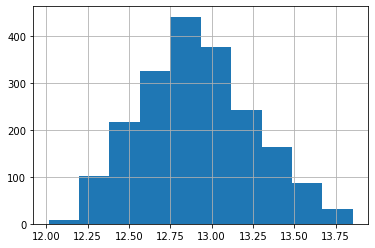

In [44]:
# take log of price and graph

hdb['log_resale_price']=np.log(hdb.resale_price)
# looks better
hdb.log_resale_price.hist();

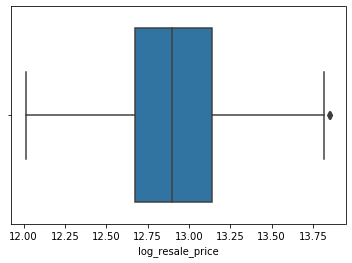

In [45]:
sns.boxplot(hdb.log_resale_price)

In [46]:
hdb

,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,remaining_lease_years,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,...,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,region_Central,region_East,region_North,region_West,log_resale_price
0,2,45.0,1986.0,2019-09-01,178000.0,5,65.33,0,0,1,...,0,0,0,0,0,0,0,0,0,12.089539
1,3,68.0,1981.0,2019-09-01,247000.0,11,60.42,0,0,0,...,0,0,0,0,0,0,0,0,0,12.417144
2,3,68.0,1980.0,2019-09-01,260000.0,2,59.33,0,0,0,...,0,0,0,0,0,0,0,0,0,12.468437
3,3,89.0,1979.0,2019-09-01,338000.0,11,58.92,0,0,0,...,0,0,0,0,0,0,0,0,0,12.730801
4,3,89.0,1980.0,2019-09-01,340000.0,8,59.33,0,0,0,...,0,0,0,0,0,0,0,0,0,12.736701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6,146.0,1986.0,2019-08-01,555000.0,5,65.92,0,0,0,...,0,0,0,0,1,0,0,1,0,13.226723
1996,6,142.0,1986.0,2019-08-01,570000.0,11,65.75,1,0,0,...,0,0,0,0,1,0,0,1,0,13.253392
1997,6,142.0,1988.0,2019-08-01,570000.0,5,67.42,1,0,0,...,0,0,0,0,1,0,0,1,0,13.253392
1998,7,179.0,1987.0,2019-08-01,788888.0,5,67.33,0,0,0,...,0,0,0,0,1,0,0,1,0,13.578380


In [47]:


#drop price column
#hdb.drop(hdb.columns[[3]], axis=1, inplace=True)

In [48]:
hdb.columns.values

array(['flat_type', 'floor_area_sqm', 'lease_commence_date', 'month',
       'resale_price', 'storey_range', 'remaining_lease_years',
       'flat_model_Apartment', 'flat_model_DBSS', 'flat_model_Improved',
       'flat_model_Maisonette', 'flat_model_Model A',
       'flat_model_Model A-Maisonette', 'flat_model_Model A2',
       'flat_model_Multi Generation', 'flat_model_New Generation',
       'flat_model_Premium Apartment', 'flat_model_Premium Maisonette',
       'flat_model_Simplified', 'flat_model_Standard',
       'flat_model_Terrace', 'flat_model_Type S1', 'town_BEDOK',
       'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG',
       'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town

In [49]:
col = ['log_resale_price','flat_type', 'floor_area_sqm', 'lease_commence_date', 'month',
       'resale_price', 'storey_range', 'remaining_lease_years',
       'flat_model_Apartment', 'flat_model_DBSS', 'flat_model_Improved',
       'flat_model_Maisonette', 'flat_model_Model A',
       'flat_model_Model A-Maisonette', 'flat_model_Model A2',
       'flat_model_Multi Generation', 'flat_model_New Generation',
       'flat_model_Premium Apartment', 'flat_model_Premium Maisonette',
       'flat_model_Simplified', 'flat_model_Standard',
       'flat_model_Terrace', 'flat_model_Type S1', 'town_BEDOK',
       'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG',
       'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES',
       'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'region_Central', 'region_East', 'region_North', 'region_West'
       ]

In [50]:
#drop column
hdb1 = hdb[col]
hdb1

,log_resale_price,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,remaining_lease_years,flat_model_Apartment,flat_model_DBSS,...,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,region_Central,region_East,region_North,region_West
0,12.089539,2,45.0,1986.0,2019-09-01,178000.0,5,65.33,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.417144,3,68.0,1981.0,2019-09-01,247000.0,11,60.42,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.468437,3,68.0,1980.0,2019-09-01,260000.0,2,59.33,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.730801,3,89.0,1979.0,2019-09-01,338000.0,11,58.92,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12.736701,3,89.0,1980.0,2019-09-01,340000.0,8,59.33,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,13.226723,6,146.0,1986.0,2019-08-01,555000.0,5,65.92,0,0,...,0,0,0,0,0,1,0,0,1,0
1996,13.253392,6,142.0,1986.0,2019-08-01,570000.0,11,65.75,1,0,...,0,0,0,0,0,1,0,0,1,0
1997,13.253392,6,142.0,1988.0,2019-08-01,570000.0,5,67.42,1,0,...,0,0,0,0,0,1,0,0,1,0
1998,13.578380,7,179.0,1987.0,2019-08-01,788888.0,5,67.33,0,0,...,0,0,0,0,0,1,0,0,1,0


In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('log_resale_price~ floor_area_sqm + storey_range + region_Central', data=hdb1, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_resale_price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     1468.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:34:29   Log-Likelihood:                 492.36
No. Observations:                2000   AIC:                            -976.7
Df Residuals:                    1996   BIC:                            -954.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.7057      0.019    621.113      0.000      11.669      11.743
floor_area_sqm     0.0103      0.000     59.655      0.000       0.010       0.011
storey_range       0.0188      0.001     24.382      0.000       0.017       0.020
region_Central     0.2348      0.011     20.516      0.000       0.212       0.257
==============================================================================
Omnibus:                       78.581   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.271
Skew:                           0.436   Prob(JB):                     2.05e-21
Kurtosis:                       3.620   Cond. No.                         452.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

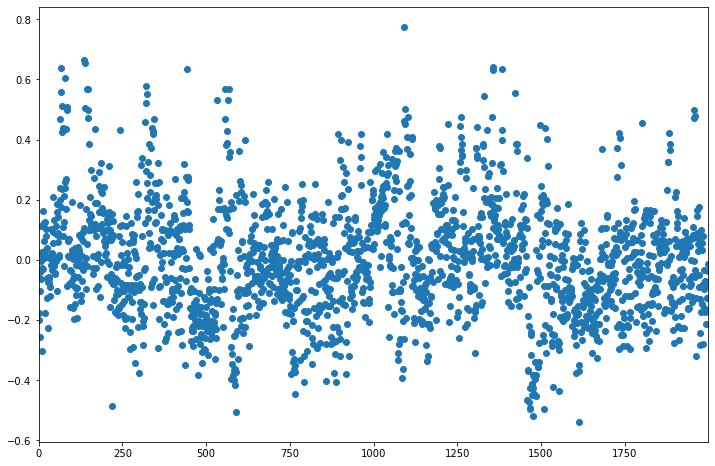

In [52]:
# Use statsmodels to plot the residuals
fit.resid.plot(style='o', figsize=(12,8));

In [53]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('log_resale_price ~ floor_area_sqm +remaining_lease_years + storey_range + region_Central+ region_East+region_North + region_West', data=hdb1, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_resale_price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1267.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:34:29   Log-Likelihood:                 1023.3
No. Observations:                2000   AIC:                            -2031.
Df Residuals:                    1992   BIC:                            -1986.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.1634      0.024    458.471      0.000      11.116      11.211
floor_area_sqm            0.0101      0.000     75.391      0.000       0.010       0.010
remaining_lease_years     0.0089      0.000     32.291      0.000       0.008       0.009
storey_range              0.0119      0.001     18.935      0.000       0.011       0.013
region_Central            0.2796      0.011     25.097      0.000       0.258       0.301
region_East               0.0766      0.012      6.551      0.000       0.054       0.099
region_North             -0.1398      0.009    -14.779      0.000      -0.158      -0.121
region_West              -0.0940      0.010     -9.389      0.000      -0.114      -0.074
==============================================================================
Omnibus:                      141.080   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.060
Skew:                           0.537   Prob(JB):                     6.70e-51
Kurtosis:                       4.273   Cond. No.                         990.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('log_resale_price ~ floor_area_sqm', data=hdb1, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_resale_price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     1978.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):          7.75e-301
Time:                        15:34:30   Log-Likelihood:                 15.335
No. Observations:                2000   AIC:                            -26.67
Df Residuals:                    1998   BIC:                            -15.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.9736      0.022    549.851      0.000      11.931      12.016
floor_area_sqm     0.0097      0.000     44.471      0.000       0.009       0.010
==============================================================================
Omnibus:                      279.697   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.422
Skew:                           1.012   Prob(JB):                     1.69e-90
Kurtosis:                       3.931   Cond. No.                         406.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
hdb.corr().iloc[[0,-2],:]

,flat_type,floor_area_sqm,lease_commence_date,resale_price,storey_range,remaining_lease_years,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Maisonette,...,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,region_Central,region_East,region_North,region_West,log_resale_price
flat_type,1.000000,0.955634,0.167621,0.653887,0.011205,0.16884,0.389794,0.024271,0.198120,0.361177,...,0.037615,0.028897,-0.083846,0.065907,0.004013,-0.134283,-0.012109,0.073309,0.067328,0.712909
region_West,0.067328,0.082092,-0.016265,-0.107456,-0.030881,-0.01572,0.054465,-0.060341,-0.000815,0.010595,...,-0.059884,-0.125881,-0.099372,-0.146426,-0.229842,-0.240319,-0.201255,-0.311702,1.000000,-0.098793


In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('log_resale_price ~ floor_area_sqm + remaining_lease_years + storey_range + region_Central+ region_East+region_North', data=hdb1, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_resale_price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1402.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:34:30   Log-Likelihood:                 980.03
No. Observations:                2000   AIC:                            -1946.
Df Residuals:                    1993   BIC:                            -1907.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.1025      0.024    463.042      0.000      11.055      11.150
floor_area_sqm            0.0100      0.000     73.271      0.000       0.010       0.010
remaining_lease_years     0.0092      0.000     33.026      0.000       0.009       0.010
storey_range              0.0120      0.001     18.588      0.000       0.011       0.013
region_Central            0.3283      0.010     32.590      0.000       0.309       0.348
region_East               0.1255      0.011     11.749      0.000       0.105       0.146
region_North             -0.0938      0.008    -11.348      0.000      -0.110      -0.078
==============================================================================
Omnibus:                      123.180   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.821
Skew:                           0.504   Prob(JB):                     9.96e-42
Kurtosis:                       4.119   Cond. No.                         922.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
pd.options.display.max_rows = 999
hdb1.corr()

,log_resale_price,flat_type,floor_area_sqm,lease_commence_date,resale_price,storey_range,remaining_lease_years,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,...,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,region_Central,region_East,region_North,region_West
log_resale_price,1.000000,0.712909,0.705294,0.354514,0.977330,0.333028,0.354648,0.202799,0.201888,0.089882,...,0.029290,0.063993,0.077103,-0.030288,-0.084048,-0.112841,0.200319,0.049610,-0.155663,-0.098793
flat_type,0.712909,1.000000,0.955634,0.167621,0.653887,0.011205,0.168840,0.389794,0.024271,0.198120,...,0.015223,0.037615,0.028897,-0.083846,0.065907,0.004013,-0.134283,-0.012109,0.073309,0.067328
floor_area_sqm,0.705294,0.955634,1.000000,0.108284,0.645954,-0.028664,0.109772,0.368515,-0.003840,0.129915,...,-0.028482,0.045762,0.072604,-0.089647,0.095495,-0.014607,-0.154006,0.043586,0.060687,0.082092
lease_commence_date,0.354514,0.167621,0.108284,1.000000,0.307882,0.261641,0.999784,0.003522,0.173369,-0.129440,...,0.297886,-0.063973,-0.039802,-0.171067,0.078162,0.116575,-0.273702,-0.137666,0.188258,-0.016265
resale_price,0.977330,0.653887,0.645954,0.307882,1.000000,0.358374,0.307745,0.195510,0.230836,0.101136,...,0.003795,0.064581,0.057968,0.013197,-0.096005,-0.123585,0.275576,0.032864,-0.177335,-0.107456
storey_range,0.333028,0.011205,-0.028664,0.261641,0.358374,1.000000,0.260521,-0.062677,0.159055,0.048139,...,0.085939,-0.035329,-0.077445,0.021846,-0.052068,-0.083775,0.171886,-0.096585,-0.089516,-0.030881
remaining_lease_years,0.354648,0.168840,0.109772,0.999784,0.307745,0.260521,1.000000,0.003717,0.173187,-0.129744,...,0.296875,-0.063601,-0.039797,-0.172463,0.077293,0.120504,-0.275915,-0.137755,0.190560,-0.015720
flat_model_Apartment,0.202799,0.389794,0.368515,0.003522,0.195510,-0.062677,0.003717,1.000000,-0.025976,-0.111174,...,-0.005514,0.001200,-0.011870,-0.037067,0.017127,0.008221,-0.089642,0.020222,0.047243,0.054465
flat_model_DBSS,0.201888,0.024271,-0.003840,0.173369,0.230836,0.159055,0.173187,-0.025976,1.000000,-0.076232,...,-0.038276,-0.015317,0.034706,0.078326,-0.037452,0.106593,0.038888,-0.006048,0.058852,-0.060341
flat_model_Improved,0.089882,0.198120,0.129915,-0.129440,0.101136,0.048139,-0.129744,-0.111174,-0.076232,1.000000,...,-0.058670,0.006190,-0.056322,0.150221,0.022689,-0.084812,0.219685,-0.057793,-0.056421,-0.000815


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#X, y = hdb1.drop('log_resale_price',axis=1), hdb1['log_resale_price']

#Separate our features from our target

#X = hdb1.loc[:,['floor_area_sqm', 'remaining_lease_years','storey_range','region_Central','region_East','region_North','region_West']]
X = hdb1.loc[:,['floor_area_sqm','storey_range', 'remaining_lease_years',
       'flat_model_Apartment', 'flat_model_DBSS', 'flat_model_Improved',
       'flat_model_Maisonette', 'flat_model_Model A',
       'flat_model_Model A-Maisonette', 'flat_model_Model A2',
       'flat_model_Multi Generation', 'flat_model_New Generation',
       'flat_model_Premium Apartment', 'flat_model_Premium Maisonette',
       'flat_model_Simplified', 'flat_model_Standard',
       'flat_model_Terrace', 'flat_model_Type S1', 'town_BEDOK',
       'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG',
       'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES',
       'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'region_Central', 'region_East', 'region_North', 'region_West']]
y = hdb1['log_resale_price']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [59]:
# YOUR SOLUTION HERE,#0.25 * 0.8 = 20 percent
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [60]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [61]:
X_train_poly.shape

(1200, 1176)

In [62]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.882
Ridge Regression val R^2: 0.883
Degree 2 polynomial regression val R^2: -409027479003571.438


In [63]:
X_train_scaled.shape

(1200, 47)

In [64]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.900


In [65]:
import numpy as np
from sklearn.model_selection import KFold

X, y = hdb1.drop('log_resale_price',axis=1), hdb1['log_resale_price']

X = hdb1.loc[:,['floor_area_sqm', 'remaining_lease_years','storey_range','region_Central','region_East','region_North', 'region_West']]

#y = hdb1['log_resale_price']
#y = hdb1['log_resale_price']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [66]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.807727991748046, 0.7923621944591381, 0.8344549842290665, 0.7917145180801866, 0.8405538584301198]
Ridge scores:  [0.8077629558919781, 0.7923456593658774, 0.8344576985849972, 0.7917511253918998, 0.8405085716077012] 

Simple mean cv r^2: 0.813 +- 0.021
Ridge mean cv r^2: 0.813 +- 0.021


In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

#lm_reg = Ridge(alpha=1)
lm.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.818


In [68]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.79141063, 0.82066893, 0.79846791, 0.81589426, 0.83634167])

In [69]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, X, y, cv=kf, scoring='r2')

array([0.80772799, 0.79236219, 0.83445498, 0.79171452, 0.84055386])

In [70]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))

0.8145825578169725
0.8145849555041131


In [71]:
hdb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 52 columns):
log_resale_price                 2000 non-null float64
flat_type                        2000 non-null int64
floor_area_sqm                   2000 non-null float64
lease_commence_date              2000 non-null float64
month                            2000 non-null datetime64[ns]
resale_price                     2000 non-null float64
storey_range                     2000 non-null int64
remaining_lease_years            2000 non-null float64
flat_model_Apartment             2000 non-null uint8
flat_model_DBSS                  2000 non-null uint8
flat_model_Improved              2000 non-null uint8
flat_model_Maisonette            2000 non-null uint8
flat_model_Model A               2000 non-null uint8
flat_model_Model A-Maisonette    2000 non-null uint8
flat_model_Model A2              2000 non-null uint8
flat_model_Multi Generation      2000 non-null uint8
flat_model_New Generation 

In [72]:
hdb1.columns.values

array(['log_resale_price', 'flat_type', 'floor_area_sqm',
       'lease_commence_date', 'month', 'resale_price', 'storey_range',
       'remaining_lease_years', 'flat_model_Apartment', 'flat_model_DBSS',
       'flat_model_Improved', 'flat_model_Maisonette',
       'flat_model_Model A', 'flat_model_Model A-Maisonette',
       'flat_model_Model A2', 'flat_model_Multi Generation',
       'flat_model_New Generation', 'flat_model_Premium Apartment',
       'flat_model_Premium Maisonette', 'flat_model_Simplified',
       'flat_model_Standard', 'flat_model_Terrace', 'flat_model_Type S1',
       'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN',
       'town_SEMBAWANG', 't

In [73]:
hdb2 =hdb1[['log_resale_price','floor_area_sqm','month', 'remaining_lease_years','storey_range','region_Central','region_East','region_North','region_West']]
hdb2

,log_resale_price,floor_area_sqm,month,remaining_lease_years,storey_range,region_Central,region_East,region_North,region_West
0,12.089539,45.0,2019-09-01,65.33,5,0,0,0,0
1,12.417144,68.0,2019-09-01,60.42,11,0,0,0,0
2,12.468437,68.0,2019-09-01,59.33,2,0,0,0,0
3,12.730801,89.0,2019-09-01,58.92,11,0,0,0,0
4,12.736701,89.0,2019-09-01,59.33,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1995,13.226723,146.0,2019-08-01,65.92,5,0,0,1,0
1996,13.253392,142.0,2019-08-01,65.75,11,0,0,1,0
1997,13.253392,142.0,2019-08-01,67.42,5,0,0,1,0
1998,13.578380,179.0,2019-08-01,67.33,5,0,0,1,0


#### Setting up for modeling:

In [74]:
#Separate our features from our target

#X = hdb1.loc[:,['floor_area_sqm', 'remaining_lease_years','storey_range','region_Central','region_East','region_North', 'region_West']]
X = hdb1.loc[:,['floor_area_sqm','storey_range', 'remaining_lease_years',
       'flat_model_Apartment', 'flat_model_DBSS', 'flat_model_Improved',
       'flat_model_Maisonette', 'flat_model_Model A',
       'flat_model_Model A-Maisonette', 'flat_model_Model A2',
       'flat_model_Multi Generation', 'flat_model_New Generation',
       'flat_model_Premium Apartment', 'flat_model_Premium Maisonette',
       'flat_model_Simplified', 'flat_model_Standard',
       'flat_model_Terrace', 'flat_model_Type S1', 'town_BEDOK',
       'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG',
       'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES',
       'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'region_Central', 'region_East', 'region_North', 'region_West']]
y = hdb1['resale_price']



In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 47 columns):
floor_area_sqm                   2000 non-null float64
storey_range                     2000 non-null int64
remaining_lease_years            2000 non-null float64
flat_model_Apartment             2000 non-null uint8
flat_model_DBSS                  2000 non-null uint8
flat_model_Improved              2000 non-null uint8
flat_model_Maisonette            2000 non-null uint8
flat_model_Model A               2000 non-null uint8
flat_model_Model A-Maisonette    2000 non-null uint8
flat_model_Model A2              2000 non-null uint8
flat_model_Multi Generation      2000 non-null uint8
flat_model_New Generation        2000 non-null uint8
flat_model_Premium Apartment     2000 non-null uint8
flat_model_Premium Maisonette    2000 non-null uint8
flat_model_Simplified            2000 non-null uint8
flat_model_Standard              2000 non-null uint8
flat_model_Terrace               2000 non

In [76]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [77]:
X_train.columns

Index(['floor_area_sqm', 'storey_range', 'remaining_lease_years',
       'flat_model_Apartment', 'flat_model_DBSS', 'flat_model_Improved',
       'flat_model_Maisonette', 'flat_model_Model A',
       'flat_model_Model A-Maisonette', 'flat_model_Model A2',
       'flat_model_Multi Generation', 'flat_model_New Generation',
       'flat_model_Premium Apartment', 'flat_model_Premium Maisonette',
       'flat_model_Simplified', 'flat_model_Standard', 'flat_model_Terrace',
       'flat_model_Type S1', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
       't

In [78]:
X_train.shape

(1200, 47)

In [79]:
X_val.shape

(400, 47)

In [80]:
X_test.shape

(400, 47)

In [81]:
#selected_columns=['floor_area_sqm', 'remaining_lease_years','storey_range','region_Central','region_East','region_North','region_West']

In [82]:
selected_columns=['floor_area_sqm','storey_range', 'remaining_lease_years',
       'flat_model_Apartment', 'flat_model_DBSS', 'flat_model_Improved',
       'flat_model_Maisonette', 'flat_model_Model A',
       'flat_model_Model A-Maisonette', 'flat_model_Model A2',
       'flat_model_Multi Generation', 'flat_model_New Generation',
       'flat_model_Premium Apartment', 'flat_model_Premium Maisonette',
       'flat_model_Simplified', 'flat_model_Standard',
       'flat_model_Terrace', 'flat_model_Type S1', 'town_BEDOK',
       'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG',
       'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES',
       'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'region_Central', 'region_East', 'region_North', 'region_West']

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 466 to 1291
Data columns (total 47 columns):
floor_area_sqm                   1200 non-null float64
storey_range                     1200 non-null int64
remaining_lease_years            1200 non-null float64
flat_model_Apartment             1200 non-null uint8
flat_model_DBSS                  1200 non-null uint8
flat_model_Improved              1200 non-null uint8
flat_model_Maisonette            1200 non-null uint8
flat_model_Model A               1200 non-null uint8
flat_model_Model A-Maisonette    1200 non-null uint8
flat_model_Model A2              1200 non-null uint8
flat_model_Multi Generation      1200 non-null uint8
flat_model_New Generation        1200 non-null uint8
flat_model_Premium Apartment     1200 non-null uint8
flat_model_Premium Maisonette    1200 non-null uint8
flat_model_Simplified            1200 non-null uint8
flat_model_Standard              1200 non-null uint8
flat_model_Terrace               1200 n

In [84]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

lasso_model = Lasso(alpha = 100000) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_train.loc[:,selected_columns], y_train)


Lasso(alpha=100000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
list(zip(selected_columns, lasso_model.coef_))

[('floor_area_sqm', 3885.61100698183),
 ('storey_range', 6462.41163220423),
 ('remaining_lease_years', 1556.1693033977974),
 ('flat_model_Apartment', -0.0),
 ('flat_model_DBSS', 0.0),
 ('flat_model_Improved', 0.0),
 ('flat_model_Maisonette', 0.0),
 ('flat_model_Model A', -0.0),
 ('flat_model_Model A-Maisonette', 0.0),
 ('flat_model_Model A2', -0.0),
 ('flat_model_Multi Generation', 0.0),
 ('flat_model_New Generation', -0.0),
 ('flat_model_Premium Apartment', -0.0),
 ('flat_model_Premium Maisonette', 0.0),
 ('flat_model_Simplified', -0.0),
 ('flat_model_Standard', 0.0),
 ('flat_model_Terrace', 0.0),
 ('flat_model_Type S1', 0.0),
 ('town_BEDOK', 0.0),
 ('town_BISHAN', 0.0),
 ('town_BUKIT BATOK', -0.0),
 ('town_BUKIT MERAH', 0.0),
 ('town_BUKIT PANJANG', -0.0),
 ('town_BUKIT TIMAH', 0.0),
 ('town_CENTRAL AREA', 0.0),
 ('town_CHOA CHU KANG', -0.0),
 ('town_CLEMENTI', 0.0),
 ('town_GEYLANG', 0.0),
 ('town_HOUGANG', -0.0),
 ('town_JURONG EAST', -0.0),
 ('town_JURONG WEST', -0.0),
 ('town_KAL

In [86]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, X_train)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           resale_price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1971.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):                        0.00
Time:                        15:34:33   Log-Likelihood:                         -14785.
No. Observations:                1200   AIC:                                  2.965e+04
Df Residuals:                    1158   BIC:                                  2.987e+04
Df Model:                          42                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
floor_area_sqm                 4376.1213     91.378     47.890      0.000    4196.837    4555.406
storey_range                   5066.0753    314.195     16.124      0.000    4449.620    5682.531
remaining_lease_years          4898.9264    184.524     26.549      0.000    4536.888    5260.965
flat_model_Apartment          -3.216e+05   2.13e+04    -15.120      0.000   -3.63e+05    -2.8e+05
flat_model_DBSS               -2.044e+05   2.36e+04     -8.677      0.000   -2.51e+05   -1.58e+05
flat_model_Improved           -3.366e+05   1.79e+04    -18.836      0.000   -3.72e+05   -3.02e+05
flat_model_Maisonette         -2.957e+05   2.14e+04    -13.843      0.000   -3.38e+05   -2.54e+05
flat_model_Model A            -3.495e+05   1.81e+04    -19.281      0.000   -3.85e+05   -3.14e+05
flat_model_Model A-Maisonette -2.063e+05   3.39e+04     -6.088      0.000   -2.73e+05    -1.4e+05
flat_model_Model A2           -3.431e+05   2.25e+04    -15.259      0.000   -3.87e+05   -2.99e+05
flat_model_Multi Generation   -2.173e+05   4.43e+04     -4.911      0.000   -3.04e+05    -1.3e+05
flat_model_New Generation     -3.234e+05   1.48e+04    -21.799      0.000   -3.52e+05   -2.94e+05
flat_model_Premium Apartment  -3.442e+05   1.93e+04    -17.809      0.000   -3.82e+05   -3.06e+05
flat_model_Premium Maisonette -1.817e-10   2.36e-11     -7.692      0.000   -2.28e-10   -1.35e-10
flat_model_Simplified         -3.097e+05   1.76e+04    -17.560      0.000   -3.44e+05   -2.75e+05
flat_model_Standard           -3.472e+05   1.99e+04    -17.457      0.000   -3.86e+05   -3.08e+05
flat_model_Terrace              1.06e+05   5.83e+04      1.817      0.069   -8433.865     2.2e+05
flat_model_Type S1            -1.311e+05   4.45e+04     -2.946      0.003   -2.18e+05   -4.38e+04
town_BEDOK                     2.907e+04   6486.704      4.482      0.000    1.63e+04    4.18e+04
town_BISHAN                    1.096e+04   1.21e+04      0.908      0.364   -1.27e+04    3.46e+04
town_BUKIT BATOK              -6370.8934   7898.421     -0.807      0.420   -2.19e+04    9125.925
town_BUKIT MERAH               2.049e+04   9545.298      2.147      0.032    1763.983    3.92e+04
town_BUKIT PANJANG            -4.784e+04   8492.671     -5.633      0.000   -6.45e+04   -3.12e+04
town_BUKIT TIMAH               9.378e+04   2.92e+04      3.214      0.001    3.65e+04    1.51e+05
town_CENTRAL AREA              9364.3801   1.96e+04      0.478      0.633   -2.91e+04    4.78e+04
town_CHOA CHU KANG            -9.655e+04   7922.868    -12.187      0.000   -1.12e+05    -8.1e+04
town_CLEMENTI                  1.086e+05   1.04e+04     10.409      0.000    8.82e+04    1.29e+05
town_GEYLANG                  -1.803e+04   1

In [87]:
np.random.seed(6)

X_train_collinear = X_train.loc[:,selected_columns]
X_train_collinear['floor_area_sqm_clone'] = (X_train_collinear['floor_area_sqm'] + 
                                      10 * np.random.randn(X_train.shape[0]))

X_train_collinear.corr() #notice .95 correlation b/w Lot Area and its "clone"

,floor_area_sqm,storey_range,remaining_lease_years,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,...,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,region_Central,region_East,region_North,region_West,floor_area_sqm_clone
floor_area_sqm,1.000000,-0.020675,0.102446,0.362095,-0.012819,0.126110,0.385216,-0.148206,0.102223,-0.036439,...,0.099939,0.057719,-0.073151,0.075400,0.001374,-0.143304,0.016484,0.070695,0.074958,0.934731
storey_range,-0.020675,1.000000,0.268092,-0.061603,0.150038,0.059113,-0.072010,0.070011,-0.022426,-0.045079,...,-0.050330,-0.079536,0.024346,-0.054037,-0.066770,0.178313,-0.089339,-0.080441,-0.050801,-0.017796
remaining_lease_years,0.102446,0.268092,1.000000,-0.003974,0.164748,-0.112006,-0.093263,0.316420,-0.047622,0.042064,...,-0.062457,-0.043654,-0.166588,0.059906,0.090000,-0.244904,-0.144242,0.153849,-0.049777,0.086712
flat_model_Apartment,0.362095,-0.061603,-0.003974,1.000000,-0.024746,-0.113139,-0.036228,-0.141069,-0.011283,-0.022679,...,0.020096,-0.001121,-0.037155,0.002518,0.013024,-0.088815,0.033518,0.048627,0.038207,0.344886
flat_model_DBSS,-0.012819,0.150038,0.164748,-0.024746,1.000000,-0.073556,-0.023553,-0.091714,-0.007335,-0.014745,...,-0.013781,0.035237,0.084818,-0.033443,0.110095,0.048477,-0.007570,0.063639,-0.066380,-0.007714
flat_model_Improved,0.126110,0.059113,-0.112006,-0.113139,-0.073556,1.000000,-0.107688,-0.419325,-0.033537,-0.067414,...,0.026407,-0.073682,0.150774,0.002882,-0.076779,0.204489,-0.085643,-0.061723,0.037721,0.124686
flat_model_Maisonette,0.385216,-0.072010,-0.093263,-0.036228,-0.023553,-0.107688,1.000000,-0.134272,-0.010739,-0.021587,...,0.066291,0.090974,-0.035365,-0.030130,0.008921,0.001641,0.028074,-0.012781,0.004520,0.355503
flat_model_Model A,-0.148206,0.070011,0.316420,-0.141069,-0.091714,-0.419325,-0.134272,1.000000,-0.041817,-0.084056,...,-0.045873,0.139567,-0.051759,0.001566,0.048710,-0.049924,0.076948,0.035998,-0.045198,-0.140588
flat_model_Model A-Maisonette,0.102223,-0.022426,-0.047622,-0.011283,-0.007335,-0.033537,-0.010739,-0.041817,1.000000,-0.006723,...,-0.006283,-0.012795,-0.011014,-0.015248,-0.025005,0.012013,-0.021858,-0.033834,0.040119,0.110602
flat_model_Model A2,-0.036439,-0.045079,0.042064,-0.022679,-0.014745,-0.067414,-0.021587,-0.084056,-0.006723,1.000000,...,-0.012630,-0.025720,-0.022139,0.146178,-0.050262,-0.052921,-0.043937,0.082013,-0.007781,-0.014723


In [88]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train_collinear))
results = model.fit()

results.summary()

/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:34:34   Log-Likelihood:                -14779.
No. Observations:                1200   AIC:                         2.965e+04
Df Residuals:                    1156   BIC:                         2.987e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -2.044e+05   6.03e+04     -3.392      0.001   -3.23e+05   -8.62e+04
floor_area_sqm                 4512.1283    192.664     23.420      0.000    4134.118    4890.139
storey_range                   5078.6084    312.932     16.229      0.000    4464.631    5692.586
remaining_lease_years          5007.4166    187.080     26.766      0.000    4640.361    5374.472
flat_model_Apartment          -1.389e+05   5.77e+04     -2.406      0.016   -2.52e+05   -2.56e+04
flat_model_DBSS               -2.045e+04   5.89e+04     -0.347      0.729   -1.36e+05    9.51e+04
flat_model_Improved           -1.515e+05   5.73e+04     -2.646      0.008   -2.64e+05   -3.92e+04
flat_model_Maisonette         -1.134e+05   5.77e+04     -1.967      0.049   -2.27e+05    -314.371
flat_model_Model A            -1.642e+05   5.74e+04     -2.861      0.004   -2.77e+05   -5.16e+04
flat_model_Model A-Maisonette -2.209e+04   6.37e+04     -0.347      0.729   -1.47e+05    1.03e+05
flat_model_Model A2           -1.569e+05   5.91e+04     -2.656      0.008   -2.73e+05    -4.1e+04
flat_model_Multi Generation   -3.501e+04   6.93e+04     -0.505      0.614   -1.71e+05    1.01e+05
flat_model_New Generation     -1.343e+05   5.76e+04     -2.333      0.020   -2.47e+05   -2.13e+04
flat_model_Premium Apartment  -1.596e+05   5.76e+04     -2.773      0.006   -2.73e+05   -4.67e+04
flat_model_Premium Maisonette  6.836e-11   8.03e-11      0.852      0.395   -8.91e-11    2.26e-10
flat_model_Simplified         -1.224e+05   5.78e+04     -2.117      0.035   -2.36e+05   -8937.794
flat_model_Standard           -1.594e+05   5.87e+04     -2.714      0.007   -2.75e+05   -4.42e+04
flat_model_Terrace              2.95e+05   8.03e+04      3.675      0.000    1.37e+05    4.52e+05
flat_model_Type S1              4.91e+04    6.9e+04      0.711      0.477   -8.63e+04    1.85e+05
town_BEDOK                     3.026e+04   6476.159      4.673      0.000    1.76e+04     4.3e+04
town_BISHAN                    9967.7219    1.2e+04      0.829      0.407   -1.36e+04    3.36e+04
town_BUKIT BATOK              -5525.6004   7871.840     -0.702      0.483    -2.1e+04    9919.093
town_BUKIT MERAH               1.982e+04   9544.053      2.077      0.038    1094.167    3.85e+04
town_BUKIT PANJANG            -4.751e+04   8458.078     -5.617      0.000   -6.41e+04   -3.09e+04
town_BUKIT TIMAH               9.561e+04   2.91e+04      3.288      0.001    3.85e+04    1.53e+05
town_CENTRAL AREA              1.183e+04   1.95e+04      0.606      0.545   -2.65e+04    5.01e+04
town_CHOA CHU KANG            -9.646e+04   7889.915    -12.225      0.000   -1.12e+05    -8.1e+04
town_CLEMENTI                  1.088e+05   1.04e+04     10.463      0.000    8.84e+04    1.29e+05
town_GEYLANG                   -1.78e+04   1.

In [89]:
lr_model_ridge = Ridge(alpha = 1000000000000)
lr_model_ridge.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_ridge.coef_))

[('floor_area_sqm', 0.0030018612886055823),
 ('storey_range', 0.0003943897076377329),
 ('remaining_lease_years', 0.0007623034074740895),
 ('flat_model_Apartment', 7.008610856028022e-06),
 ('flat_model_DBSS', 4.957574313508017e-06),
 ('flat_model_Improved', 8.328924267305309e-06),
 ('flat_model_Maisonette', 9.132997763951918e-06),
 ('flat_model_Model A', -6.45058927266891e-06),
 ('flat_model_Model A-Maisonette', 1.2236111810106693e-06),
 ('flat_model_Model A2', -1.6615503481643869e-06),
 ('flat_model_Multi Generation', 6.591932427469826e-07),
 ('flat_model_New Generation', -1.9792376044241583e-05),
 ('flat_model_Premium Apartment', 1.59589228378493e-06),
 ('flat_model_Premium Maisonette', 0.0),
 ('flat_model_Simplified', -6.156270535639717e-06),
 ('flat_model_Standard', -1.1877828367748883e-06),
 ('flat_model_Terrace', 4.151531345431123e-07),
 ('flat_model_Type S1', 1.5814591992209252e-06),
 ('town_BEDOK', -1.940163084779184e-06),
 ('town_BISHAN', 5.225165348336774e-06),
 ('town_BUKIT B

In [90]:
lr_model_lasso = Lasso(alpha = 100000)
lr_model_lasso.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_lasso.coef_))

[('floor_area_sqm', 3885.61100698183),
 ('storey_range', 6462.41163220423),
 ('remaining_lease_years', 1556.1693033977974),
 ('flat_model_Apartment', -0.0),
 ('flat_model_DBSS', 0.0),
 ('flat_model_Improved', 0.0),
 ('flat_model_Maisonette', 0.0),
 ('flat_model_Model A', -0.0),
 ('flat_model_Model A-Maisonette', 0.0),
 ('flat_model_Model A2', -0.0),
 ('flat_model_Multi Generation', 0.0),
 ('flat_model_New Generation', -0.0),
 ('flat_model_Premium Apartment', -0.0),
 ('flat_model_Premium Maisonette', 0.0),
 ('flat_model_Simplified', -0.0),
 ('flat_model_Standard', 0.0),
 ('flat_model_Terrace', 0.0),
 ('flat_model_Type S1', 0.0),
 ('town_BEDOK', 0.0),
 ('town_BISHAN', 0.0),
 ('town_BUKIT BATOK', -0.0),
 ('town_BUKIT MERAH', 0.0),
 ('town_BUKIT PANJANG', -0.0),
 ('town_BUKIT TIMAH', 0.0),
 ('town_CENTRAL AREA', 0.0),
 ('town_CHOA CHU KANG', -0.0),
 ('town_CLEMENTI', 0.0),
 ('town_GEYLANG', 0.0),
 ('town_HOUGANG', -0.0),
 ('town_JURONG EAST', -0.0),
 ('town_JURONG WEST', -0.0),
 ('town_KAL

In [91]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])

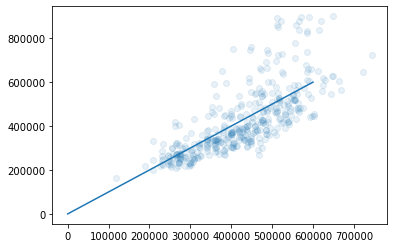

In [92]:
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))

In [93]:
#r-squared
r2_score(y_test, test_set_pred)

0.5625651498867784

In [94]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

72612.06386080007

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [96]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [97]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(X_train.values)

In [98]:
## Apply the scaler to the test set

X_te = std.transform(X_test.values)

In [99]:
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not usually output pandas objects

type(X_train), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

(array([1156.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          44.]),
 array([-0.19509558,  0.33698327,  0.86906211,  1.40114095,  1.9332198 ,
         2.46529864,  2.99737748,  3.52945633,  4.06153517,  4.59361401,
         5.12569286]),
 <a list of 10 Patch objects>)

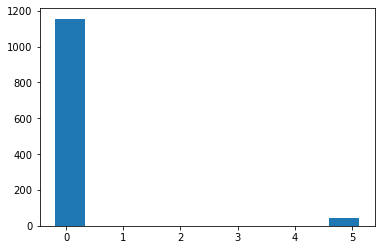

In [100]:
## Here we can plot histograms of the transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they are not necessarily normally distributed)

plt.hist(X_tr[:,3])

In [101]:
## Fit a LASSO model on the standardized data

lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
## Note that now we can meaningful compare the importance of
## different features, since they're on the same scale

## But it's now difficult to interpret the coefficients
## We would need to translate back to the original feature scales by dividing
## each coefficient by the original column's standard deviation

list(zip(X_train.columns, lasso_model.coef_))

[('floor_area_sqm', 98342.89694588682),
 ('storey_range', 27965.326563491162),
 ('remaining_lease_years', 33404.91906533098),
 ('flat_model_Apartment', 0.0),
 ('flat_model_DBSS', 13068.320667087615),
 ('flat_model_Improved', -0.0),
 ('flat_model_Maisonette', 0.0),
 ('flat_model_Model A', -0.0),
 ('flat_model_Model A-Maisonette', 0.0),
 ('flat_model_Model A2', -0.0),
 ('flat_model_Multi Generation', 0.0),
 ('flat_model_New Generation', 0.0),
 ('flat_model_Premium Apartment', -0.0),
 ('flat_model_Premium Maisonette', 0.0),
 ('flat_model_Simplified', -0.0),
 ('flat_model_Standard', -0.0),
 ('flat_model_Terrace', 2643.819614998984),
 ('flat_model_Type S1', 4862.673514483967),
 ('town_BEDOK', 1065.462578127602),
 ('town_BISHAN', 0.0),
 ('town_BUKIT BATOK', -0.0),
 ('town_BUKIT MERAH', 0.0),
 ('town_BUKIT PANJANG', -0.0),
 ('town_BUKIT TIMAH', 0.0),
 ('town_CENTRAL AREA', 0.0),
 ('town_CHOA CHU KANG', -7233.467919077124),
 ('town_CLEMENTI', 4921.716684428268),
 ('town_GEYLANG', -0.0),
 ('tow

In [103]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1748766012734.9197, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1748664451218.3052, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1748558083439.5288, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective di

/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1742329796039.621, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1741924357670.859, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1741499815308.5256, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did 

/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1716766349021.7908, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1715165630412.4897, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1713490749703.6255, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective di

/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1617992745760.6753, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1611950093810.746, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1605644273230.827, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did 

/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1300117317721.2825, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1282131624690.5356, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1263569495745.7678, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective di

/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 594725711638.1868, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566258637593.6377, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 537990545988.2368, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did n

/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14639193274.70996, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9166442615.304688, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4986291081.111816, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did n

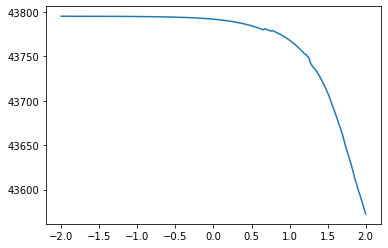

In [104]:
#plot the curve of validation error as alpha changes


plt.plot(np.log10(alphalist), err_vec_val)

In [105]:
## This is the minimum error achieved on the validation set 
## across the different alpha values we tried

np.min(err_vec_val)

43572.540184630416

In [106]:
## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_val)]

100.0

In [107]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [108]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [109]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1748766012734.9197, tolerance: 2945162509.6072683
  positive)


LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [110]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.01

In [111]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('floor_area_sqm', 109673.62653051446),
 ('storey_range', 28841.816012306244),
 ('remaining_lease_years', 66503.05733852838),
 ('flat_model_Apartment', -22290.702956444202),
 ('flat_model_DBSS', -7.670538215196769),
 ('flat_model_Improved', -56900.68503125064),
 ('flat_model_Maisonette', -16721.279289240465),
 ('flat_model_Model A', -68238.71481830518),
 ('flat_model_Model A-Maisonette', -136.7711741294037),
 ('flat_model_Model A2', -15683.5304380736),
 ('flat_model_Multi Generation', -608.9142299344039),
 ('flat_model_New Generation', -38553.19613423982),
 ('flat_model_Premium Apartment', -42375.33698037428),
 ('flat_model_Premium Maisonette', 0.0),
 ('flat_model_Simplified', -20739.96859794368),
 ('flat_model_Standard', -18192.951540580405),
 ('flat_model_Terrace', 9082.313708969283),
 ('flat_model_Type S1', 3459.080071756661),
 ('town_BEDOK', 9855.867177905604),
 ('town_BISHAN', 20066.631044024907),
 ('town_BUKIT BATOK', -2500.447723109794),
 ('town_BUKIT MERAH', 28583.812738630662

In [112]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [113]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

43327.48773377898

In [114]:
r2_score(y_test, test_set_pred)

0.8582148307116706

In [115]:
from sklearn.linear_model import lars_path

In [116]:
## Scale the variables
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [117]:
X_tr = std.transform(X_train.values)

In [118]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


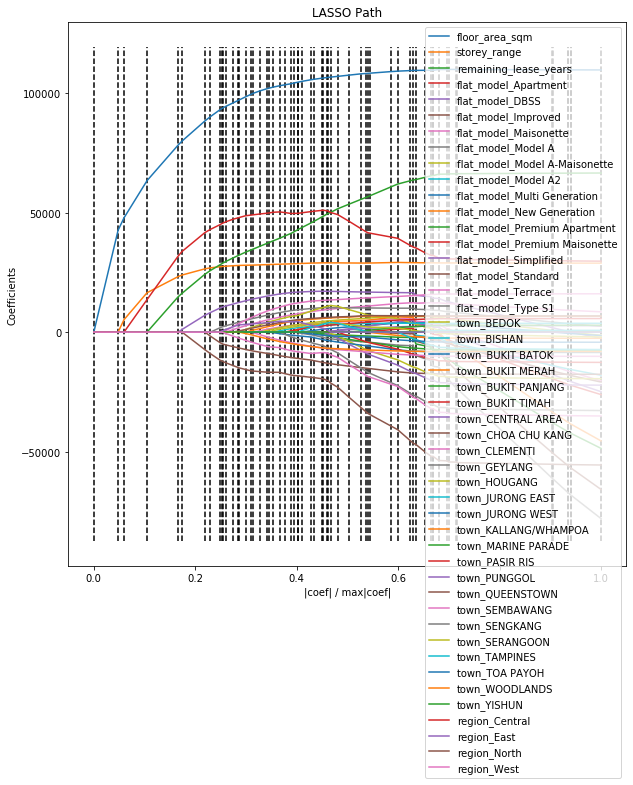

In [119]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

In [120]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

In [121]:
split_and_validate(X, y)


Validation R^2 score was: 0.8606029606383624
Feature coefficient results: 

floor_area_sqm : 4376.36
storey_range : 4936.47
remaining_lease_years : 4946.96
flat_model_Apartment : -128490.03
flat_model_DBSS : -10015.75
flat_model_Improved : -149824.06
flat_model_Maisonette : -109182.04
flat_model_Model A : -157058.81
flat_model_Model A-Maisonette : -18270.59
flat_model_Model A2 : -155090.95
flat_model_Multi Generation : -29493.33
flat_model_New Generation : -129144.34
flat_model_Premium Apartment : -153436.03
flat_model_Premium Maisonette : -206612.90
flat_model_Simplified : -118244.47
flat_model_Standard : -157361.15
flat_model_Terrace : 298994.50
flat_model_Type S1 : 54202.47
town_BEDOK : 34158.11
town_BISHAN : 11842.93
town_BUKIT BATOK : -4310.36
town_BUKIT MERAH : 21246.83
town_BUKIT PANJANG : -46638.87
town_BUKIT TIMAH : 104187.63
town_CENTRAL AREA : 13470.95
town_CHOA CHU KANG : -92816.78
town_CLEMENTI : 117671.68
town_GEYLANG : -22028.76
town_HOUGANG : -70627.15
town_JURONG EAST

# Linear Regression

In [122]:
# Fit train data to Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# Train set R2 with cross-validation and standard deviation
cvs_lm = cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2')
print(("Linear Regression train Kfold mean R^2:"), round(np.mean(cvs_lm),3), "+-", round(np.std(cvs_lm),3) )

# Test set R2
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression train Kfold mean R^2: 0.863 +- 0.007
Linear Regression test R^2: 0.856


In [123]:
#Feature scaling for lasso and ridge model on both train and test set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso

In [124]:
# Fit train data to Lasso Model
lm_lasso = Lasso(alpha=10)
lm_lasso.fit(X_train_scaled, y_train)

# Train set R2 with cross-validation and standard deviation
cvs_lasso = cross_val_score(lm_lasso, X_train_scaled, y_train, cv=kf, scoring='r2')
print( ("Lasso Regression train Kfold mean R^2:"), round(np.mean(cvs_lasso),3), "+-", round(np.std(cvs_lasso),3) )

# Test set R2
print(f'Lasso Regression test R^2: {lm_lasso.score(X_test_scaled, y_test):.3f}')

/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559183115194.1648, tolerance: 2945162509.6072683
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80081008596.24097, tolerance: 2387565953.964738
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 426117124359.7168, tolerance: 2310288630.3509746
  positive)


Lasso Regression train Kfold mean R^2: 0.862 +- 0.007
Lasso Regression test R^2: 0.861


/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 341997946117.43726, tolerance: 2397831264.2639937
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334794537039.81665, tolerance: 2316449551.5961623
  positive)
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276369714549.4055, tolerance: 2367186283.4479117
  positive)


# Ridge

In [125]:
# Fit train data to Ridge Model
lm_ridge = Ridge(alpha=10)
lm_ridge.fit(X_train_scaled, y_train)

# Train set R2 with cross-validation and standard deviation
cvs_ridge = cross_val_score(lm_ridge,X_train_scaled, y_train, cv=kf, scoring='r2')
print( ("Ridge Regression train Kfold mean R^2:"), round(np.mean(cvs_ridge),3), "+-", round(np.std(cvs_ridge),3) )

# Test set R2
print(f'Ridge Regression test R^2: {lm_ridge.score(X_test_scaled, y_test):.3f}')

Ridge Regression train Kfold mean R^2: 0.86 +- 0.009
Ridge Regression test R^2: 0.867


# Polynomial

In [126]:
#Feature transformation for Polynomial 
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train.values)
X_test_poly = poly.fit_transform(X_test.values)

# Fit transformed data to Polynomial Model
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)

# Train set R2 with cross-validation and standard deviation
cvs_poly = cross_val_score(lm_poly, X_train_poly, y_train, cv=kf, scoring='r2')
print( ("Degree 2 polynomial train Kfold mean R^2:"), round(np.mean(cvs_poly),3), "+-", round(np.std(cvs_poly),3) )

# Test set R2
print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}') 

Degree 2 polynomial train Kfold mean R^2: -68429185461424.586 +- 97096236946519.23
Degree 2 polynomial regression test R^2: 0.817


In [127]:
from sklearn.ensemble import RandomForestRegressor
# Fit train data to Random Forest Model
rf = RandomForestRegressor()
rf_train = rf.fit(X_train, y_train)

# Train set R2 with cross-validation and standard deviation
cvs_rf = cross_val_score(rf_train,X_train, y_train, cv=kf, scoring='r2')
print( ("Random Forest Regression train Kfold mean R^2:"), round(np.mean(cvs_rf),3), "+-", round(np.std(cvs_rf),3) )

# Test set R2
print(f'Random Forest Regression test R^2: {rf_train.score(X_test, y_test):.3f}') 

/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression train Kfold mean R^2: 0.846 +- 0.015
Random Forest Regression test R^2: 0.857


# Assumption Testing

#### 1. Distribution of target

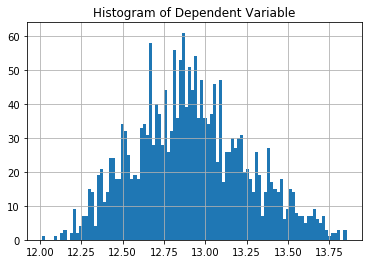

In [128]:
# inspect histogram of target
hdb2['log_resale_price'].hist(bins=100)
plt.title('Histogram of Dependent Variable')
plt.show()

#### 2. Residual-Prediction Plot

/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/victor/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


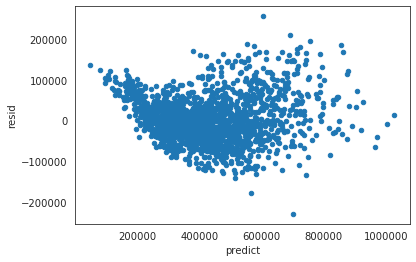

In [129]:
lr = LinearRegression() #best model
lr = lr.fit(X,y) 
# Plot predicted values on the x-axis, and residuals on the y-axis
hdb2['predict']=lr.predict(X)
hdb2['resid']=y-hdb2.predict

with sns.axes_style('white'):
    plot=hdb2.plot(kind='scatter',
                  x='predict',y='resid',figsize=(6,4))

plt.show()

#### 3. Residuals Normal Distribution 

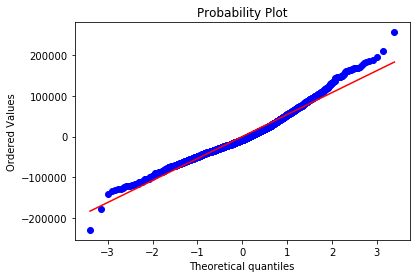

<Figure size 576x576 with 0 Axes>

In [130]:
# diagnose/inspect residual normality using probplot:
stats.probplot(hdb2['resid'], dist="norm", plot=plt)
plt.figure(figsize=(8,8))
plt.show()

### The data does not seems to observe a normal distribution. Use Box-Cox to find lamda for transformation but none.

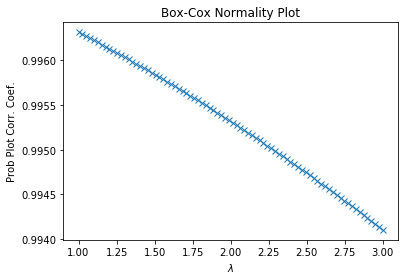

In [131]:
# inspect to examine for box cox transformation
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(hdb2['log_resale_price']+1, 1, 3, plot=ax)

In [ ]:
# use pairplot to visualize relationships of features, predict & residual with target and their distributions
sns.pairplot(hdb2)

In [ ]:
# Refer to earlier model section
# slice data into features and target

X = hdb1.loc[:,['floor_area_sqm', 'remaining_lease_years','storey_range','region_Central','region_East','region_North','region_West']]

y = hdb1['log_resale_price']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

# YOUR SOLUTION HERE,#0.25 * 0.8 = 20 percent
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)


lm = LinearRegression() #best model

#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')


In [ ]:
df1 = pd.DataFrame({'log_Actual': y_test, 'log_Predicted': lm.predict(X_test)})
df1

In [ ]:
df1['Actual']= np.exp(df1['log_Actual'])

In [ ]:
df1['Predicted']= np.exp(df1['log_Predicted'])

In [ ]:
df1

In [ ]:
df1['Actual']= np.exp(df1['log_Actual'])

In [ ]:
df1['Predicted']= np.exp(df1['log_Predicted'])

In [ ]:
df1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def diagnostic_plot():
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(X_train,y_train)
    pred = rgr.predict(X_test)

   # plt.subplot(1, 3, 1)
   # plt.scatter(X_test,y_test)
   # plt.plot(X_test,pred, color='blue',linewidth=1)
   # plt.title("Regression fit")
   # plt.xlabel("x")
   # plt.ylabel("y")
    
    plt.subplot(1, 3, 1)
    res = y_test - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

In [ ]:
diagnostic_plot()

# Assumption 2: residuals ( ${e_i} = Y_i-\hat{Y}_i$ ) should be normally distributed with zero mean


In [ ]:
# Plot your predicted values on the x-axis, and your residuals on the y-axis
rgr = LinearRegression()
rgr.fit(X_train,y_train)
pred = rgr.predict(X_test)
res = y_test - pred
with sns.axes_style('white'):
    plt.scatter(pred,res,alpha =0.2)

In [ ]:
# inspect histogram of target
hdb2['log_resale_price'].hist(bins=100)
plt.title('Histogram of Dependent Variable')
plt.show()

In [ ]:
#Generates a probability plot of sample data against the quantiles of a 
# specified theoretical distribution 
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

# Assumption 3: error terms must have constant variance

In [ ]:
hdb2.describe()

In [ ]:
# look at numeric data

# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('log_resale_price ~ floor_area_sqm + remaining_lease_years + storey_range + region_Central+ region_East+region_North+region_West', data=hdb1, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()


In [ ]:
# Plot your predicted values on the x-axis, and your residuals on the y-axis
rgr = LinearRegression()
rgr.fit(X_train,y_train)
pred = rgr.predict(X_test)
res = y_test - pred
with sns.axes_style('white'):
    plt.scatter(pred,res,alpha =0.2)

In [ ]:
# create histogram
hdb1.resale_price.hist();

# note the positive skew

In [ ]:
# quick reg plot
plt.scatter(hdb2.floor_area_sqm,y)
plt.scatter(hdb2.floor_area_sqm,hdb2.predict);

In [ ]:
# try log transformation
hdb2.log_resale_price.hist();

# it looks better but not very "normal"

In [ ]:
lamb=stats.boxcox_normmax(hdb2.log_resale_price, brack=(-3, -2.92)) # don't use "lambda" as it's a Python reserved word
print("Lambda:", lamb)
y_t=(np.power(hdb2.log_resale_price,-lamb)-1)/-lamb

plt.hist(y_t);

In [ ]:
# plot to show optimal lambda values
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(hdb2.log_resale_price, -5, 5, plot=ax)

In [ ]:
# STUDENT SECTION
lamb_bud = stats.boxcox_normmax(hdb2.floor_area_sqm , brack=(-3, -2.92)) # don't use "lambda" as it's a Python reserved word
print("Lambda:", lamb_bud)
hdb2['floor_area'] = (np.power(hdb2.floor_area_sqm,-lamb_bud)-1)/-lamb_bud

plt.hist(hdb2.floor_area);

In [ ]:
lamb_runtime = stats.boxcox_normmax(hdb2.remaining_lease_years , brack=(-3, -2.92)) # don't use "lambda" as it's a Python reserved word
print("Lambda:", lamb_runtime)
hdb2['remaining_lease'] = np.log(hdb2.remaining_lease_years)

plt.hist(hdb2['remaining_lease']);

In [ ]:
X = hdb2[['floor_area','remaining_lease']]
y = y_t

model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

# Assumption 4: errors are uncorrelated across observations

To check this assumption, let's plot residuals vs. time: 

In [ ]:
hdb2

In [ ]:
# combine date and time into a single datetime column
#df["month"] = pd.to_datetime(df.month, format="%Y-%m")
ts = hdb2[['month','resid']].set_index('month')
ts.plot(style=".");
# there seems to be no pattern, so we're good!

# Assumption 5: no independent variable is a perfect linear function of any other independent variable (no perfect multi-collinearity)
